# Analysis of Pixar Films

## Workflow of the Project

<ul>
    <li>Data Collection and Loading</li>
    <li>Data Exploration</li>
    <li>Exploratory Data Analysis</li>
</ul>

### Importing the Dependencies

In [4]:
# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Library for Warning Message
import warnings
warnings.simplefilter("ignore")

# Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

### Data Collection and Loading

Project - Pixar Films
<br>
Data Source: *"https://mavenanalytics.io/data-playground?dataStructure=Multiple%20tables&order=date_added%2Cdesc"*

In [7]:
# Load the Datasets
films_df = pd.read_csv("pixar_films.csv")
people_df = pd.read_csv("pixar_people.csv")
genres_df = pd.read_csv("genres.csv")
box_off_df = pd.read_csv("box_office.csv")
reviews_df = pd.read_csv("public_response.csv")
awards_df = pd.read_csv("academy.csv")

We have 6 dataframes consists of details related to films, film-makers, genres, box office, reviews, and awards.

### Data Exploration

1. **Films Data**

In [11]:
# View the Data
films_df.head()

,number,film,release_date,run_time,film_rating,plot
0,1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...
1,2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h..."
2,3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ..."
3,4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s..."
4,5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...


In [12]:
# Dimension of Data
print("No. of rows: {}".format(films_df.shape[0]))
print(" ")
print("No. of columns: {}".format(films_df.shape[1]))

No. of rows: 28
 
No. of columns: 6


In [13]:
# Data Type
films_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   number        28 non-null     int64 
 1   film          28 non-null     object
 2   release_date  28 non-null     object
 3   run_time      28 non-null     int64 
 4   film_rating   28 non-null     object
 5   plot          28 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.4+ KB


The column "release_date" needs to be converted to "datetime" type.

In [15]:
films_df['release_date'] = pd.to_datetime(films_df['release_date'])

# Verify the type
films_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   number        28 non-null     int64         
 1   film          28 non-null     object        
 2   release_date  28 non-null     datetime64[ns]
 3   run_time      28 non-null     int64         
 4   film_rating   28 non-null     object        
 5   plot          28 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ KB


In [16]:
# Checking of Missing Values
films_is_missing = films_df.isna().sum().sum()

if films_is_missing == 0:
    print("No, the Films datasets doesn't contain any missing values.")
else:
    print("The Films datasets contains {} missing values.".format(films_is_missing))

No, the Films datasets doesn't contain any missing values.


In [17]:
# Check of duplicate rows
films_is_duplicate = films_df.duplicated().sum()

if films_is_duplicate == 0:
    print("No, the Films datasets doesn't contain any duplicated rows.")
else:
    print("The Films datasets contains {} duplicated rows.".format(films_is_duplicate))

No, the Films datasets doesn't contain any duplicated rows.


2. **Film-makers Data**

In [19]:
# View the Data
people_df.head()

,film,role_type,name
0,Toy Story,Director,John Lasseter
1,Toy Story,Musician,Randy Newman
2,Toy Story,Producer,Bonnie Arnold
3,Toy Story,Producer,Ralph Guggenheim
4,Toy Story,Screenwriter,Joel Cohen


In [20]:
# Dimension of Data
print("No. of rows: {}".format(people_df.shape[0]))
print("")
print("No. of columns: {}".format(people_df.shape[1]))

No. of rows: 260

No. of columns: 3


In [21]:
# Data Type
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   film       260 non-null    object
 1   role_type  260 non-null    object
 2   name       260 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [22]:
# Checking of Missing Values
people_is_missing  = people_df.isna().sum().sum()

if people_is_missing == 0:
    print("No, the Film-makers datasets doesn't contain any missing values.")
else:
    print("The Film-makers datasets contains {} missing values.".format(people_is_missing))

No, the Film-makers datasets doesn't contain any missing values.


In [23]:
# Checking of Duplicate Rows
people_is_duplicate = people_df.duplicated().sum()

if people_is_duplicate == 0:
    print("No, the Film-makers datasets doesn't contain any duplicated rows.")
else:
    print("The Film-makers datasets contains {} duplicated rows.".format(people_is_duplicate))

The Film-makers datasets contains 7 duplicated rows.


In [24]:
# View the rows which are duplicated including the original
people_df[people_df.duplicated(keep = False)]

,film,role_type,name
114,Brave,Director,Mark Andrews
115,Brave,Director,Mark Andrews
118,Brave,Screenwriter,Mark Andrews
119,Brave,Screenwriter,Mark Andrews
120,Brave,Screenwriter,Mark Andrews
121,Brave,Screenwriter,Mark Andrews
222,Luca,Screenwriter,Jesse Andrews
223,Luca,Screenwriter,Jesse Andrews
224,Luca,Storywriter,Jesse Andrews
225,Luca,Storywriter,Jesse Andrews


In [25]:
# Remove the duplicated rows
people_df = people_df.drop_duplicates()

In [26]:
# Verify
people_is_duplicates = people_df.duplicated().sum()

if people_is_duplicates == 0:
    print("No, the Film-makers datasets doesn't contain any duplicated rows.")
else:
    print("The Film-makers datasets contains {} duplicated rows.".format(people_is_duplicates))

No, the Film-makers datasets doesn't contain any duplicated rows.


In [27]:
# Final Dimension
print("No. of rows: {}".format(people_df.shape[0]))
print("")
print("No. of columns: {}".format(people_df.shape[1]))

No. of rows: 253

No. of columns: 3


3. **Genres Data**

In [29]:
# View the Data
genres_df.head()

,film,category,value
0,Toy Story,Genre,Adventure
1,Toy Story,Genre,Animation
2,Toy Story,Genre,Comedy
3,Toy Story,Subgenre,Buddy Comedy
4,Toy Story,Subgenre,Computer Animation


In [30]:
# Dimension of Data
print("No. of rows: {}".format(genres_df.shape[0]))
print("")
print("No. of columns: {}".format(genres_df.shape[1]))

No. of rows: 204

No. of columns: 3


In [31]:
# Data Type
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   film      204 non-null    object
 1   category  204 non-null    object
 2   value     204 non-null    object
dtypes: object(3)
memory usage: 4.9+ KB


In [32]:
# Checking of Missing Values
genres_is_missing  = genres_df.isna().sum().sum()

if genres_is_missing == 0:
    print("No, the Genres datasets doesn't contain any missing values.")
else:
    print("The Genres datasets contains {} missing values.".format(genres_is_missing))

No, the Genres datasets doesn't contain any missing values.


In [33]:
# Checking of Duplicate Rows
genres_is_duplicate = genres_df.duplicated().sum()

if genres_is_duplicate == 0:
    print("No, the Genres datasets doesn't contain any duplicated rows.")
else:
    print("The Genres datasets contains {} duplicated rows.".format(genres_is_duplicate))

No, the Genres datasets doesn't contain any duplicated rows.


4. **Box Office Data**

In [35]:
# View the Data
box_off_df.head()

,film,budget,box_office_us_canada,box_office_other,box_office_worldwide
0,Toy Story,30000000.0,223225679,171210907,394436586
1,A Bug's Life,120000000.0,162798565,200460294,363258859
2,Toy Story 2,90000000.0,245852179,265506097,511358276
3,"Monsters, Inc.",115000000.0,255873250,272900000,528773250
4,Finding Nemo,94000000.0,339714978,531300000,871014978


In [36]:
# Dimension of Data
print("No. of rows: {}".format(box_off_df.shape[0]))
print("")
print("No. of columns: {}".format(box_off_df.shape[1]))

No. of rows: 28

No. of columns: 5


In [37]:
# Data Type
box_off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film                  28 non-null     object 
 1   budget                27 non-null     float64
 2   box_office_us_canada  28 non-null     int64  
 3   box_office_other      28 non-null     int64  
 4   box_office_worldwide  28 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ KB


The box_office earnings columns should be in float type. Thus, we will replaced it to float type.

In [39]:
# Change to Float
to_float_cols = ["box_office_us_canada", "box_office_other", "box_office_worldwide"]
box_off_df[to_float_cols] = box_off_df[to_float_cols].astype(float)

# Verify
box_off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film                  28 non-null     object 
 1   budget                27 non-null     float64
 2   box_office_us_canada  28 non-null     float64
 3   box_office_other      28 non-null     float64
 4   box_office_worldwide  28 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [40]:
# Checking of Missing Values
box_off_is_missing  = box_off_df.isna().sum().sum()

if box_off_is_missing == 0:
    print("No, the Box Office datasets doesn't contain any missing values.")
else:
    print("The Box Office datasets contains {} missing values.".format(box_off_is_missing))

The Box Office datasets contains 1 missing values.


In [41]:
# Check the rows
box_off_df[box_off_df.isna().any(axis = 1)]

,film,budget,box_office_us_canada,box_office_other,box_office_worldwide
23,Luca,NaN,1324302.0,49788012.0,51112314.0


Only budget is missing for the film "Luna" and rest details are present, so we will replace it with 0.

In [43]:
box_off_df['budget'] = box_off_df['budget'].fillna(0)

# Verify
box_off_is_missing  = box_off_df.isna().sum().sum()

if box_off_is_missing == 0:
    print("No, the Box Office datasets doesn't contain any missing values.")
else:
    print("The Box Office datasets contains {} missing values.".format(box_off_is_missing))

No, the Box Office datasets doesn't contain any missing values.


In [44]:
# Checking of Duplicate Rows
box_off_is_duplicate = box_off_df.duplicated().sum()

if box_off_is_duplicate == 0:
    print("No, the Box Office datasets doesn't contain any duplicated rows.")
else:
    print("The Box Office datasets contains {} duplicated rows.".format(box_off_is_duplicate))

No, the Box Office datasets doesn't contain any duplicated rows.


5. **Public Reviews Data**

In [46]:
# View the Data
reviews_df.head()

,film,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,cinema_score,imdb_score,imdb_counts
0,Toy Story,100,96,95,26,A,8.3,1089101
1,A Bug's Life,92,91,78,23,A,7.2,319596
2,Toy Story 2,100,172,88,34,A+,7.9,630573
3,"Monsters, Inc.",96,199,79,35,A+,8.1,1000657
4,Finding Nemo,99,270,90,38,A+,8.2,1132877


In [47]:
# Dimension of Data
print("No. of rows: {}".format(reviews_df.shape[0]))
print("")
print("No. of columns: {}".format(reviews_df.shape[1]))

No. of rows: 28

No. of columns: 8


In [48]:
# Data Type
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   film                    28 non-null     object 
 1   rotten_tomatoes_score   28 non-null     int64  
 2   rotten_tomatoes_counts  28 non-null     int64  
 3   metacritic_score        28 non-null     int64  
 4   metacritic_counts       28 non-null     int64  
 5   cinema_score            25 non-null     object 
 6   imdb_score              28 non-null     float64
 7   imdb_counts             28 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.9+ KB


In [49]:
# Checking of Missing Values
reviews_is_missing  = reviews_df.isna().sum().sum()

if reviews_is_missing == 0:
    print("No, the Reviews datasets doesn't contain any missing values.")
else:
    print("The Reviews datasets contains {} missing values.".format(reviews_is_missing))

The Reviews datasets contains 3 missing values.


In [50]:
# Check the rows
reviews_df[reviews_df.isna().any(axis = 1)]

,film,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,cinema_score,imdb_score,imdb_counts
22,Soul,95,360,83,55,NaN,8.0,392783
23,Luca,91,303,71,52,NaN,7.4,202404
24,Turning Red,95,289,83,52,NaN,7.0,158649


The data of "cinema_score" is missing for the films "Soul", "Luca", and "Turning Red". Thus, we will replace it with "Unknown".

In [52]:
# Replace the NaN
reviews_df['cinema_score'] = reviews_df['cinema_score'].fillna("Unknown")

# Verify
reviews_is_missing  = reviews_df.isna().sum().sum()

if reviews_is_missing == 0:
    print("No, the Reviews datasets doesn't contain any missing values.")
else:
    print("The Reviews datasets contains {} missing values.".format(reviews_is_missing))

No, the Reviews datasets doesn't contain any missing values.


In [53]:
# Checking of Duplicate Rows
reviews_is_duplicate = reviews_df.duplicated().sum()

if reviews_is_duplicate == 0:
    print("No, the Reviews datasets doesn't contain any duplicated rows.")
else:
    print("The Reviews datasets contains {} duplicated rows.".format(reviews_is_duplicate))

No, the Reviews datasets doesn't contain any duplicated rows.


6. **Academy Awards Data**

In [55]:
# View the Data
awards_df.head()

,film,award_type,status
0,Toy Story,Animated Feature,Award not yet introduced
1,Toy Story,Original Screenplay,Nominated
2,Toy Story,Adapted Screenplay,Ineligible
3,Toy Story,Original Score,Nominated
4,Toy Story,Original Song,Nominated


In [56]:
# Dimension of Data
print("No. of Rows: {}".format(awards_df.shape[0]))
print("")
print("No. of columns: {}".format(awards_df.shape[1]))

No. of Rows: 89

No. of columns: 3


In [57]:
# Data Type
awards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   film        89 non-null     object
 1   award_type  89 non-null     object
 2   status      89 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [58]:
# Checking of Missing Values
awards_is_missing  = awards_df.isna().sum().sum()

if awards_is_missing == 0:
    print("No, the Awards datasets doesn't contain any missing values.")
else:
    print("The Awards datasets contains {} missing values.".format(awards_is_missing))

No, the Awards datasets doesn't contain any missing values.


In [59]:
# Checking of Duplicate Rows
awards_is_duplicate = awards_df.duplicated().sum()

if awards_is_duplicate == 0:
    print("No, the Awards datasets doesn't contain any duplicated rows.")
else:
    print("The Awards datasets contains {} duplicated rows.".format(awards_is_duplicate))

No, the Awards datasets doesn't contain any duplicated rows.


### Exploratory Data Analysis (EDA)

1. **Films Data**

**Key Questions**

<ul>
    <li>How many distinct pixar films are there in this datasets?</li>
    <li>Among the movie list, Which film is the oldest and most recent?</li>
    <li>How many movies are released before the year 2000?</li>
    <li>How many movies are released between the year 2000 and 2010?</li>
    <li>How many movies are released between the year 2011 and 2020?</li>
    <li>How many movies are released after the year 2020? (Excluding 2020)</li>
    <li>Which movie's runtime is least and most?</li>
    <li>What is the average run time?</li>
    <li>How many movie's run time is less than the overall average run time?</li>
    <li>How many movie's run time is greater than to the overall average run time?</li>
    <li>How many movie's run time is equal to the overall average run time?</li>
    <li>How many distinct film ratings are there?</li>
    <li>How many movies are rated 'G' and which are they, meaning they contain content suitable for all audiences?</li>
    <li>How many movies are rated 'PG', suggesting parental guidance is advised?</li>
    <li>When was the last time a movie suitable for all audiences (G-rated) was released?</li>
    <li>On which days are movies most frequently released?</li>
</ul>

In [63]:
films_df.set_index("number", inplace = True)

<font color = "blue">How many distinct pixar films are there in this datasets?</font>

In [65]:
print("There are {} distinct pixar movies in this dataset.".format(films_df['film'].nunique()))

There are 28 distinct pixar movies in this dataset.


<font color = "blue">Among the movie list, Which film is the oldest and most recent?</font>

In [67]:
oldest_film = films_df[films_df['release_date'] == films_df['release_date'].min()].iloc[0]

print("Among all the movies, {} is the oldest movie which was released on {}.".
      format(oldest_film['film'], oldest_film['release_date'].date()))

Among all the movies, Toy Story is the oldest movie which was released on 1995-11-22.


In [68]:
recent_film = films_df[films_df['release_date'] == films_df['release_date'].max()].iloc[0]

print("Among all the movies, {} is the most recent movie which was released on {}.".
      format(recent_film['film'], recent_film['release_date'].date()))

Among all the movies, Inside Out 2 is the most recent movie which was released on 2024-06-14.


<font color = "blue">How many movies are released before the year 2000?</font>

In [70]:
films_before_2000 = films_df[films_df['release_date'].dt.year < 2000]

print("There are {} movies which released before the year 2000.".format(len(films_before_2000)))
print("")

# View the data
films_before_2000

There are 3 movies which released before the year 2000.



,film,release_date,run_time,film_rating,plot
number,,,,,
1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...
2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h..."
3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ..."


<font color = "blue">How many movies are released between the year 2000 and 2010?</font>

In [72]:
films_bet_2000_10 = films_df[(films_df['release_date'].dt.year >= 2000) & (films_df['release_date'].dt.year <= 2010)]
print("There are {} movies which released between the year 2000 and 2010.".format(len(films_bet_2000_10)))
print("")

# View the data
films_bet_2000_10

There are 8 movies which released between the year 2000 and 2010.



,film,release_date,run_time,film_rating,plot
number,,,,,
4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s..."
5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...
6,The Incredibles,2004-11-05,115,PG,"While trying to lead a quiet suburban life, a ..."
7,Cars,2006-06-09,116,G,"On the way to the biggest race of his life, a ..."
8,Ratatouille,2007-06-29,111,G,A rat who can cook makes an unusual alliance w...
9,WALL-E,2008-06-27,98,G,A robot who is responsible for cleaning a wast...
10,Up,2009-05-29,96,PG,78-year-old Carl Fredricksen travels to South ...
11,Toy Story 3,2010-06-18,103,G,The toys are mistakenly delivered to a day-car...


<font color = "blue">How many movies are released between the year 2011 and 2020?</font>

In [74]:
films_bet_2011_20 = films_df[(films_df['release_date'].dt.year >= 2011) & (films_df['release_date'].dt.year <= 2020)]
print("There are {} movies which released between the year 2011 and 2020.".format(len(films_bet_2011_20)))
print("")

# View the data
films_bet_2011_20

There are 12 movies which released between the year 2011 and 2020.



,film,release_date,run_time,film_rating,plot
number,,,,,
12,Cars 2,2011-06-24,106,G,Star race car Lightning McQueen and his pal Ma...
13,Brave,2012-06-22,93,PG,"Determined to make her own path in life, Princ..."
14,Monsters University,2013-06-21,104,G,A look at the relationship between Mike Wazows...
15,Inside Out,2015-06-19,95,PG,After young Riley is uprooted from her Midwest...
16,The Good Dinosaur,2015-11-25,93,PG,In a world where dinosaurs and humans live sid...
17,Finding Dory,2016-06-17,97,PG,Friendly but forgetful blue tang Dory begins a...
18,Cars 3,2017-06-16,102,G,Lightning McQueen sets out to prove to a new g...
19,Coco,2017-11-22,105,PG,"Aspiring musician Miguel, confronted with his ..."
20,Incredibles 2,2018-06-15,118,PG,The Incredibles family takes on a new mission ...


<font color = "blue">How many movies are released after the year 2020? (Excluding 2020)</font>

In [76]:
films_after_2020 = films_df[films_df['release_date'].dt.year > 2020]
print("There are {} movies which released after the year 2020.".format(len(films_after_2020)))
print("")

# View the data
films_after_2020

There are 5 movies which released after the year 2020.



,film,release_date,run_time,film_rating,plot
number,,,,,
24,Luca,2021-06-18,95,PG,"On the Italian Riviera, an unlikely but strong..."
25,Turning Red,2022-03-11,100,PG,A thirteen-year-old girl named Mei Lee is torn...
26,Lightyear,2022-06-17,105,PG,While spending years attempting to return home...
27,Elemental,2023-06-16,101,PG,"Follows Ember and Wade, in a city where fire-,..."
28,Inside Out 2,2024-06-14,96,PG,A sequel that features Riley entering puberty ...


<font color = "blue">Which movie's runtime is least and most?</font>

In [78]:
least_runtime = films_df[films_df['run_time'] == films_df['run_time'].min()].iloc[0]
print("The movie - {} - has the least run time of {} minutes.".format(least_runtime['film'], least_runtime['run_time']))
print("")

# View the data
films_df[films_df['run_time'] == films_df['run_time'].min()]

The movie - Toy Story - has the least run time of 81 minutes.



,film,release_date,run_time,film_rating,plot
number,,,,,
1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...


In [79]:
most_runtime = films_df[films_df['run_time'] == films_df['run_time'].max()].iloc[0]
print("The movie - {} - has the most run time of {} minutes.".format(most_runtime['film'], most_runtime['run_time']))
print("")

# View the data
films_df[films_df['run_time'] == films_df['run_time'].max()]

The movie - Incredibles 2 - has the most run time of 118 minutes.



,film,release_date,run_time,film_rating,plot
number,,,,,
20,Incredibles 2,2018-06-15,118,PG,The Incredibles family takes on a new mission ...


<font color = "blue">What is the average run time?</font>

In [81]:
average_run_time = films_df.run_time.mean().round()

print("The average run time of a film is {} minutes.".format(average_run_time))

The average run time of a film is 100.0 minutes.


<font color = "blue">How many movie's run time is less than the overall average run time?</font>

In [83]:
less_than_avg = films_df[films_df['run_time'] < average_run_time]
print("{} movies whose run time is less than the overall average run time of {} minutes.".
      format(len(less_than_avg), average_run_time))
print("")

# View the Data
less_than_avg

12 movies whose run time is less than the overall average run time of 100.0 minutes.



,film,release_date,run_time,film_rating,plot
number,,,,,
1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...
2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h..."
3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ..."
4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s..."
9,WALL-E,2008-06-27,98,G,A robot who is responsible for cleaning a wast...
10,Up,2009-05-29,96,PG,78-year-old Carl Fredricksen travels to South ...
13,Brave,2012-06-22,93,PG,"Determined to make her own path in life, Princ..."
15,Inside Out,2015-06-19,95,PG,After young Riley is uprooted from her Midwest...
16,The Good Dinosaur,2015-11-25,93,PG,In a world where dinosaurs and humans live sid...


<font color = "blue">How many movie's run time is greater than to the overall average run time?</font>

In [85]:
greater_than_avg = films_df[films_df['run_time'] > average_run_time]
print("{} movies whose run time is greater than the overall average run time of {} minutes.".
      format(len(greater_than_avg), average_run_time))
print("")

# View the Data
greater_than_avg

12 movies whose run time is greater than the overall average run time of 100.0 minutes.



,film,release_date,run_time,film_rating,plot
number,,,,,
6,The Incredibles,2004-11-05,115,PG,"While trying to lead a quiet suburban life, a ..."
7,Cars,2006-06-09,116,G,"On the way to the biggest race of his life, a ..."
8,Ratatouille,2007-06-29,111,G,A rat who can cook makes an unusual alliance w...
11,Toy Story 3,2010-06-18,103,G,The toys are mistakenly delivered to a day-car...
12,Cars 2,2011-06-24,106,G,Star race car Lightning McQueen and his pal Ma...
14,Monsters University,2013-06-21,104,G,A look at the relationship between Mike Wazows...
18,Cars 3,2017-06-16,102,G,Lightning McQueen sets out to prove to a new g...
19,Coco,2017-11-22,105,PG,"Aspiring musician Miguel, confronted with his ..."
20,Incredibles 2,2018-06-15,118,PG,The Incredibles family takes on a new mission ...


<font color = "blue">How many movie's run time is equal to the overall average run time?</font>

In [87]:
equal_avg = films_df[films_df['run_time'] == average_run_time]
print("{} movies whose run time is equal to the overall average run time of {} minutes.".
      format(len(equal_avg), average_run_time))
print("")

# View the Data
equal_avg

4 movies whose run time is equal to the overall average run time of 100.0 minutes.



,film,release_date,run_time,film_rating,plot
number,,,,,
5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...
21,Toy Story 4,2019-06-21,100,G,"When a new toy called ""Forky"" joins Woody and ..."
23,Soul,2020-12-25,100,PG,Joe is a middle-school band teacher whose life...
25,Turning Red,2022-03-11,100,PG,A thirteen-year-old girl named Mei Lee is torn...


<font color = "blue">How many distinct film ratings are there?</font>

In [89]:
print("There are {} distinct film ratings and they are {} and {}.".
      format(films_df['film_rating'].nunique(), films_df['film_rating'].unique()[0], films_df['film_rating'].unique()[1]))

There are 2 distinct film ratings and they are G and PG.


<font color = "blue">How many movies are rated 'G' and which are they, meaning they contain content suitable for all audiences?</font>

In [91]:
g_rated = films_df[films_df.film_rating == "G"]
print("There are {} movies where the content is suitable for all audiences.".format(len(g_rated)))
print("")

# View the Data
g_rated

There are 13 movies where the content is suitable for all audiences.



,film,release_date,run_time,film_rating,plot
number,,,,,
1,Toy Story,1995-11-22,81,G,A cowboy doll is profoundly threatened and jea...
2,A Bug's Life,1998-11-25,95,G,"A misfit ant, looking for ""warriors"" to save h..."
3,Toy Story 2,1999-11-24,92,G,"When Woody is stolen by a toy collector, Buzz ..."
4,"Monsters, Inc.",2001-11-02,92,G,"In order to power the city, monsters have to s..."
5,Finding Nemo,2003-05-30,100,G,After his son is captured in the Great Barrier...
7,Cars,2006-06-09,116,G,"On the way to the biggest race of his life, a ..."
8,Ratatouille,2007-06-29,111,G,A rat who can cook makes an unusual alliance w...
9,WALL-E,2008-06-27,98,G,A robot who is responsible for cleaning a wast...
11,Toy Story 3,2010-06-18,103,G,The toys are mistakenly delivered to a day-car...


<font color = "blue">How many movies are rated 'PG', suggesting parental guidance is advised?</font>

In [93]:
pg_rated = films_df[films_df.film_rating == "PG"]
print("There are {} movies rated 'PG', which suggests that some material may not be suitable for children and parental guidance is advised."
      .format(len(pg_rated)))
print("")

# View the Data
pg_rated

There are 15 movies rated 'PG', which suggests that some material may not be suitable for children and parental guidance is advised.



,film,release_date,run_time,film_rating,plot
number,,,,,
6,The Incredibles,2004-11-05,115,PG,"While trying to lead a quiet suburban life, a ..."
10,Up,2009-05-29,96,PG,78-year-old Carl Fredricksen travels to South ...
13,Brave,2012-06-22,93,PG,"Determined to make her own path in life, Princ..."
15,Inside Out,2015-06-19,95,PG,After young Riley is uprooted from her Midwest...
16,The Good Dinosaur,2015-11-25,93,PG,In a world where dinosaurs and humans live sid...
17,Finding Dory,2016-06-17,97,PG,Friendly but forgetful blue tang Dory begins a...
19,Coco,2017-11-22,105,PG,"Aspiring musician Miguel, confronted with his ..."
20,Incredibles 2,2018-06-15,118,PG,The Incredibles family takes on a new mission ...
22,Onward,2020-03-06,102,PG,Teenage elf brothers Ian and Barley embark on ...


<font color = "blue">When was the last time a movie suitable for all audiences (G-rated) was released?</font>

In [95]:
latest_g_rated = g_rated[g_rated.release_date == g_rated.release_date.max()].iloc[0]
print("The most recent movie rated 'G', suitable for all audiences, was {}, which was released on {}.".
      format(latest_g_rated['film'], latest_g_rated['release_date'].date()))

The most recent movie rated 'G', suitable for all audiences, was Toy Story 4, which was released on 2019-06-21.


<font color = "blue">On which days are movies most frequently released?</font>

,day_name,film_count
0,Friday,23
1,Wednesday,5


<Figure size 1000x800 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Day of the week')

Text(0, 0.5, 'No. of Films Released')

Text(0.5, 1.0, 'Number of Films Released by Day of the Week')

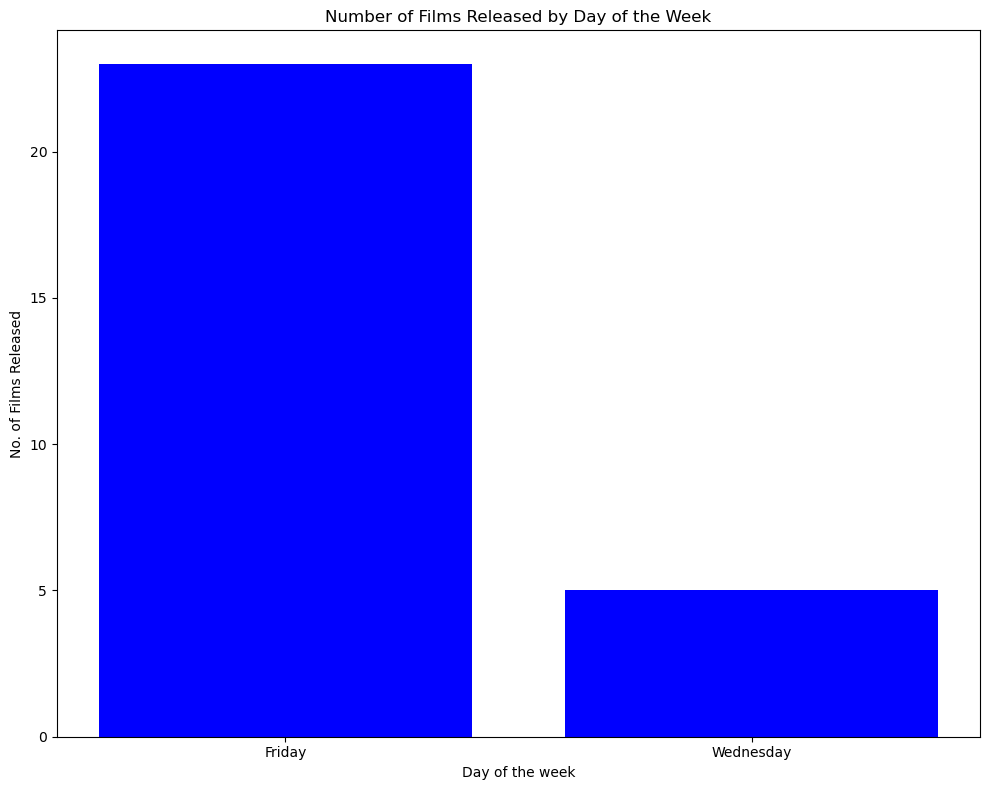

In [97]:
# Create a copy first
day_df = films_df.copy()

# Add the "Day" column
day_df['day_name'] = day_df['release_date'].dt.day_name()

# View the data
day_compare = day_df.groupby("day_name", as_index = False)[["film"]].count().rename(columns = {"film" : "film_count"})
day_compare

# Visualize
plt.figure(figsize = (10,8))
plt.bar(day_compare['day_name'], day_compare['film_count'], color = "blue")
plt.xlabel("Day of the week")
plt.ylabel("No. of Films Released")
plt.title("Number of Films Released by Day of the Week")
plt.tight_layout()
plt.show()

In [98]:
prop = day_df.day_name.value_counts()
friday_prop = ((prop[0] / (prop[0] + prop[1])) * 100).round()
wed_prop = 1 - friday_prop

print("{}% of the movies were released on Friday, highlighting Friday as a popular release day for attracting larger crowds.".
      format(friday_prop))

82.0% of the movies were released on Friday, highlighting Friday as a popular release day for attracting larger crowds.


2. **Film-makers Data**

**Key Questions**

<ul>
    <li>Who are the core contributors behind the scenes of a film?</li>
    <li>What is the size of the core team responsible for executing a film?</li>
    <li>Which people contributed to multiple roles in a single film, and what were those counts?</li>
    <li>Lists the individuals who have contributed to more than one film</li>
    <li>How many contributors are associated with each film?</li>
    <li>Are there people who consistently served in the same role across different films?</li>
    <li>Which contributors had both Director and Producer roles?</li>
    <li>Which films had multiple people serving the same role (e.g., more than one Producer)?</li>
</ul>

In [101]:
people_df.head()

,film,role_type,name
0,Toy Story,Director,John Lasseter
1,Toy Story,Musician,Randy Newman
2,Toy Story,Producer,Bonnie Arnold
3,Toy Story,Producer,Ralph Guggenheim
4,Toy Story,Screenwriter,Joel Cohen


<font color = "blue">Who are the core contributors behind the scenes of a film?</font>

In [103]:
print("Generally, a film is created by these {} people and they are {}, {}, {}, {}, {}, and {}. ".
      format(people_df.role_type.nunique(), people_df.role_type.unique()[0], people_df.role_type.unique()[1],
             people_df.role_type.unique()[2], people_df.role_type.unique()[3], people_df.role_type.unique()[4],
             people_df.role_type.unique()[5]))

Generally, a film is created by these 6 people and they are Director, Musician, Producer, Screenwriter, Storywriter, and Co-director. 


<font color = "blue">What is the size of the core team responsible for executing a film?</font>

In [105]:
core_team = people_df.groupby("role_type", as_index = False)[["name"]].count().rename(columns = {"name" : "num_of_crew"})

core_team = core_team.sort_values("num_of_crew", ascending = False)

core_team

,role_type,num_of_crew
5,Storywriter,82
4,Screenwriter,64
3,Producer,33
2,Musician,31
1,Director,28
0,Co-director,15


<Figure size 1000x800 with 0 Axes>

<BarContainer object of 6 artists>

Text(0.5, 0, 'Role Types')

Text(0, 0.5, 'Number of Crew')

Text(0.5, 1.0, 'Size of the Core Team for Film Execution')

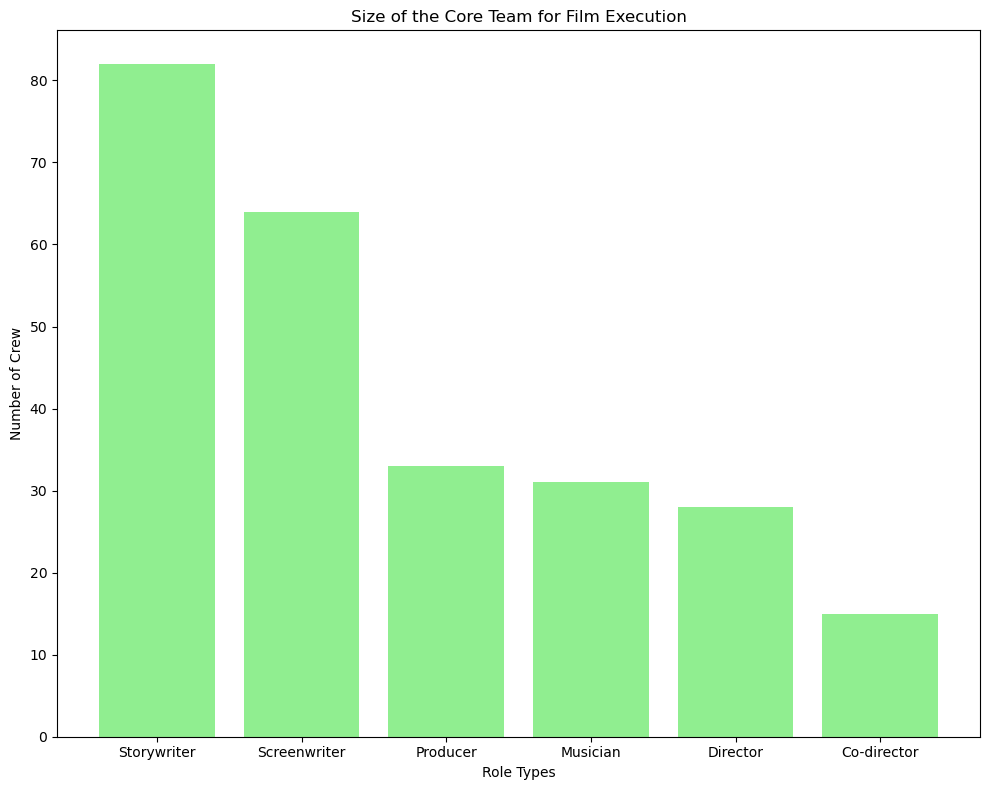

In [106]:
# Visualize
plt.figure(figsize = (10,8))
plt.bar(core_team['role_type'], core_team['num_of_crew'], color = "lightgreen")
plt.xlabel("Role Types")
plt.ylabel("Number of Crew")
plt.title("Size of the Core Team for Film Execution")
plt.tight_layout()
plt.show()

<font color = "blue">Which people contributed to multiple roles in a single film, and what were those counts?</font>

In [108]:
roles = people_df.groupby(["film", "name"], as_index=False).agg({"role_type": "count"})
roles.rename(columns={"role_type": "num_roles"}, inplace=True)
multiple_roles = roles[roles.num_roles > 1]
multiple_roles = multiple_roles.sort_values(by=["name", "film"])

# View the Result
multiple_roles

,film,name,num_roles
32,Coco,Adrian Molina,3
0,A Bug's Life,Andrew Stanton,3
44,Finding Dory,Andrew Stanton,3
49,Finding Nemo,Andrew Stanton,3
121,Toy Story,Andrew Stanton,2
130,Toy Story 2,Andrew Stanton,2
147,Toy Story 4,Andrew Stanton,2
168,WALL-E,Andrew Stanton,3
71,Lightyear,Angus MacLane,3
131,Toy Story 2,Ash Brannon,2


<font color = "blue">Lists the individuals who have contributed to more than one film</font>

In [110]:
film_per_person =  people_df.groupby("name", as_index = False)[["film"]].count().rename(columns = {"film" : "film_count"})
film_per_person = film_per_person[film_per_person.film_count > 1].sort_values("film_count", ascending = False)

# View the Result
film_per_person

,name,film_count
3,Andrew Stanton,20
76,Pete Docter,14
46,John Lasseter,13
81,Randy Newman,9
11,Brad Bird,9
71,Michael Giacchino,8
62,Lee Unkrich,7
18,Dan Scanlon,6
65,Mark Andrews,6
8,Bob Peterson,6


Andrew Stanton, Pete Docter, and John Lasseter are the top contributors, working on 20, 14, and 13 films respectively.

<Figure size 1000x800 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 0, 'Name of the Contributors')

Text(0, 0.5, 'Number of Films')

Text(0.5, 1.0, 'Top 5 Contributors Across Multiple Films')

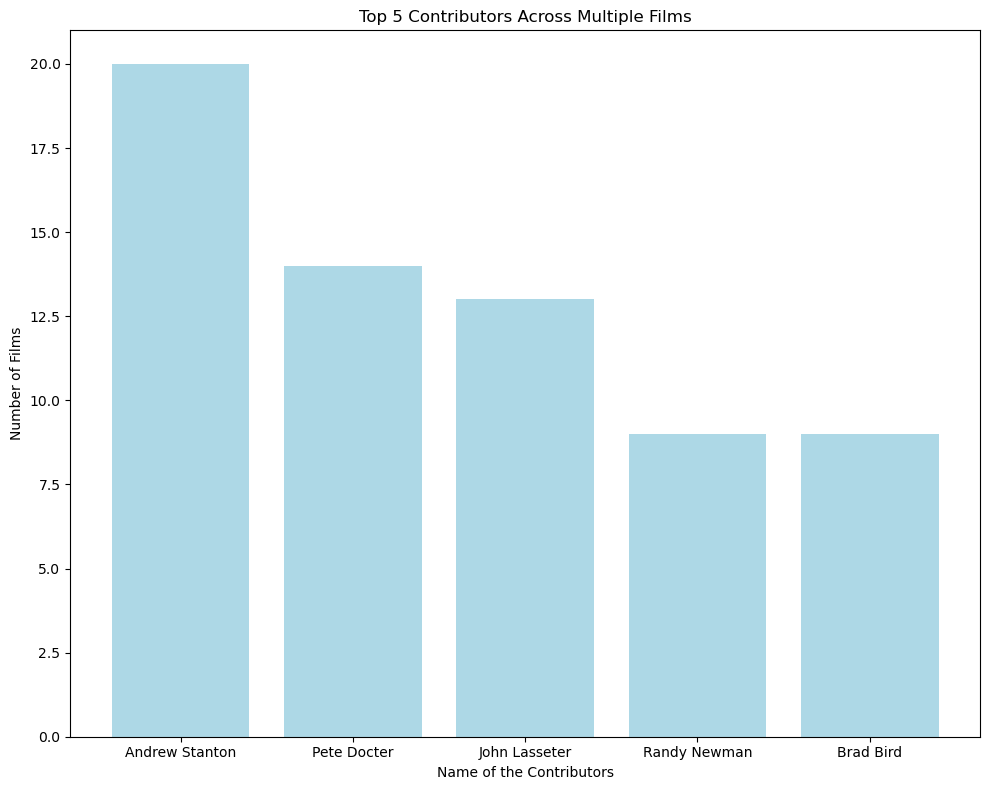

In [112]:
top_5_contributors = film_per_person.head()

# Visualize
plt.figure(figsize = (10,8))
plt.bar(top_5_contributors['name'], top_5_contributors['film_count'], color = "lightblue")
plt.xlabel("Name of the Contributors")
plt.ylabel("Number of Films")
plt.title("Top 5 Contributors Across Multiple Films")
plt.tight_layout()
plt.show()

<font color = "blue">How many contributors are associated with each film?</font>

In [114]:
people_df.groupby("film", as_index = False)[["name"]].nunique().rename(columns = {"name" : "num_of_contributors"})\
.sort_values("num_of_contributors", ascending = False)

,film,num_of_contributors
24,Toy Story 4,11
22,Toy Story 2,11
15,"Monsters, Inc.",10
21,Toy Story,10
4,Cars 3,9
0,A Bug's Life,8
19,The Good Dinosaur,8
2,Cars,8
10,Inside Out,7
8,Finding Nemo,6


<Figure size 1000x800 with 0 Axes>

<BarContainer object of 5 artists>

Text(0, 0.5, 'Films')

Text(0.5, 0, 'Number of Crew')

Text(0.5, 1.0, 'Top 5 Films by Crew Size')

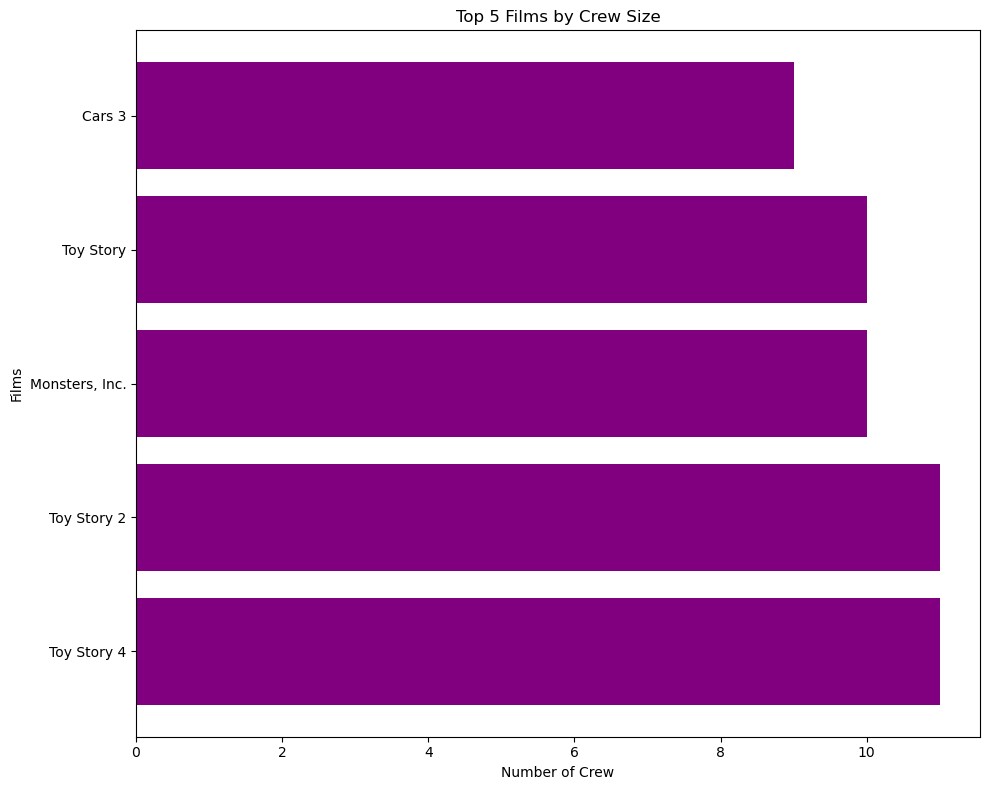

In [115]:
crew_per_films = people_df.groupby("film", as_index = False)[["name"]].nunique().rename(columns = {"name" : "num_of_contributors"})\
.sort_values("num_of_contributors", ascending = False)

top_5_crew = crew_per_films.head()

# Visualize
plt.figure(figsize = (10,8))
plt.barh(top_5_crew['film'], top_5_crew['num_of_contributors'], color = "purple")
plt.ylabel("Films")
plt.xlabel("Number of Crew")
plt.title("Top 5 Films by Crew Size")
plt.tight_layout()
plt.show()

<font color = "blue">Are there people who consistently served in the same role across different films?</font>

In [117]:
role_counts = people_df.groupby("name", as_index = False)[["role_type"]].nunique().rename(columns = {"role_type" : "unique_roles"})

# Filter Unique Roles (1)
same_role = role_counts[role_counts.unique_roles == 1]

# View the role types
role_result = people_df.merge(same_role[["name"]], on = "name")

# Count how many films each person with consistent role worked on
role_result.groupby(["name", "role_type"], as_index = False)[["film"]].nunique().rename(columns = {"film" : "film_count"}).\
sort_values("film_count", ascending = False)

,name,role_type,film_count
47,Randy Newman,Musician,9
40,Michael Giacchino,Musician,8
7,Darla K. Anderson,Producer,5
52,Thomas Newman,Musician,4
28,Jonas Rivera,Producer,3
11,Denise Ream,Producer,3
33,Kiel Murray,Screenwriter,2
42,Mychael,Musician,2
32,Kevin Reher,Producer,2
37,Mark Nielsen,Producer,2


<font color = "blue">Which contributors had both Director and Producer roles?</font>

In [119]:
direction_roles = ["Director", "Co-director"]
production_roles = ["Producer"]
target_roles = direction_roles + production_roles

direction_crew = people_df[people_df["role_type"].isin(direction_roles)]["name"].unique()
production_crew = people_df[people_df["role_type"].isin(production_roles)]["name"].unique()

combine_roles = set(direction_crew) & set(production_crew)

people_df[people_df["name"].isin(combine_roles) & (people_df["role_type"].isin(target_roles))].\
sort_values("name").drop_duplicates(subset = ["name", "role_type"])

,film,role_type,name
77,Ratatouille,Producer,Brad Lewis
105,Cars 2,Co-director,Brad Lewis
219,Luca,Director,Jesse Andrews
221,Luca,Producer,Jesse Andrews
113,Brave,Co-director,Mark Andrews
114,Brave,Director,Mark Andrews
117,Brave,Producer,Mark Andrews


<font color = "blue">Which films had multiple people serving the same role (e.g., more than one Producer)?</font>

In [121]:
multi_role_df = people_df.groupby(["film", "role_type"], as_index = False)["name"].nunique().rename(columns={"name": "num_of_crew"})
multi_role_df = multi_role_df[multi_role_df["num_of_crew"] > 1]
multi_role_df = multi_role_df.sort_values(by=["num_of_crew", "film"], ascending=[False, True])

# View result
multi_role_df

,film,role_type,num_of_crew
136,Toy Story 4,Storywriter,8
16,Cars,Screenwriter,6
110,The Good Dinosaur,Storywriter,5
28,Cars 3,Storywriter,4
34,Coco,Storywriter,4
39,Elemental,Storywriter,4
88,"Monsters, Inc.",Storywriter,4
119,Toy Story,Screenwriter,4
120,Toy Story,Storywriter,4
125,Toy Story 2,Screenwriter,4


3. **Genres Data**

**Key Questions**

<ul>
    <li>How many unique categories are there?</li>
    <li>How many types of genres and sub-genres are there?</li>
    <li>Which film has the highest number of genre tags?</li>
    <li>Which film has the most subgenre classifications?</li>
    <li>Are there any films with only a genre but no subgenre (or vice versa)?</li>
    <li>What are the top 3 most common genres across all films?</li>
    <li>What are the top 5 most common subgenres?</li>
</ul>

<font color = "blue">How many unique categories are there?</font>

In [125]:
print("There are {} genres and they are {} and {}.".format(genres_df.category.nunique(), genres_df.category.unique()[0], 
                                                           genres_df.category.unique()[1]))

There are 2 genres and they are Genre and Subgenre.


<font color = "blue">How many types of genres and sub-genres are there?</font>

In [127]:
type_genre = genres_df[genres_df.category == "Genre"].value

print("There are {} types of genres and they consists of: {}".format(type_genre.nunique(), type_genre.unique()))

There are 6 types of genres and they consists of: ['Adventure' 'Animation' 'Comedy' 'Action' 'Family' 'Drama']


In [128]:
sub_type_genre = genres_df[genres_df.category == "Subgenre"].value

print("There are {} types of sub-genres and they consists of:\n {}".format(sub_type_genre.nunique(), sub_type_genre.unique()))

There are 33 types of sub-genres and they consists of:
 ['Buddy Comedy' 'Computer Animation' 'Fantasy' 'Supernatural Fantasy'
 'Urban Adventure' 'Animal Adventure' 'Quest' 'Sea Adventure' 'Superhero'
 'Motorsport' 'Sport' 'Adventure Epic' 'Artificial Intelligence'
 'Dystopian Sci-Fi' 'Sci-Fi' 'Space Sci-Fi' 'Coming-of-Age'
 'Globetrotting Adventure' 'Car Action' 'Crime' 'Spy' 'Fairy Tale'
 'Sword & Sorcery' 'Teen Adventure' 'Dinosaur Adventure' 'Music' 'Mystery'
 'Road Trip' 'Fantasy Epic' 'Teen Comedy' 'Time Travel' 'Romance'
 'Teen Drama']


<font color = "blue">Which film has the highest number of genre tags?</font>

In [130]:
genres_df[genres_df.category == "Genre"].groupby("film", as_index = False)[["category"]].count().rename(
    columns = {"category" : "num_of_genres"})

,film,num_of_genres
0,A Bug's Life,3
1,Brave,3
2,Cars,3
3,Cars 2,3
4,Cars 3,3
5,Coco,3
6,Elemental,3
7,Finding Dory,3
8,Finding Nemo,3
9,Incredibles 2,3


Every movie contains 3 types of genres.

<font color = "blue">Which film has the most subgenre classifications?</font>

In [133]:
top_subgenre_count = genres_df[genres_df.category == "Subgenre"].groupby("film", as_index = False)[["category"]].count().rename(
                        columns = {"category" : "num_of_subgenres"})

top_subgenre_count = top_subgenre_count.sort_values("num_of_subgenres", ascending = False)
top_subgenre_count[top_subgenre_count.num_of_subgenres == top_subgenre_count.num_of_subgenres.max()]

,film,num_of_subgenres
27,WALL-E,6
3,Cars 2,6
1,Brave,6


The films WALL-E, Cars 2, and Brave each have the highest number of subgenres, with a total of 6 subgenres assigned to them.

<font color = "blue">Are there any films with only a genre but no subgenre (or vice versa)?</font>

In [136]:
g_count = genres_df[genres_df.category == "Genre"].groupby("film", as_index = False).size().rename(columns = {"size" : "genre_count"})
sg_count = genres_df[genres_df.category == "Subgenre"].groupby("film", as_index = False).size().rename(columns = {"size" : "subgenre_count"})

film_count = g_count.merge(sg_count, on = "film", how = "outer")
film_count

,film,genre_count,subgenre_count
0,A Bug's Life,3,3
1,Brave,3,6
2,Cars,3,3
3,Cars 2,3,6
4,Cars 3,3,4
5,Coco,3,5
6,Elemental,3,4
7,Finding Dory,3,4
8,Finding Nemo,3,5
9,Incredibles 2,3,4


In [137]:
film_count.isna().sum()

film              0
genre_count       0
subgenre_count    0
dtype: int64

Both "genre_count" and "subgenre_count" contain no missing values, indicating that every film has at least one genre and one subgenre—there are no films with only one or the other.

<font color = "blue">What are the top 3 most common genres across all films?</font>

In [140]:
genre_count = genres_df[genres_df.category == "Genre"].groupby("value", as_index = False)[["film"]].count().rename(
    columns = {"film" : "genre_count"})
genre_count = genre_count.sort_values("genre_count", ascending = False)
top_3_genre = genre_count.head(3)

# View the result
top_3_genre

,value,genre_count
1,Adventure,28
2,Animation,28
3,Comedy,21


The top three most common genres across all films are Adventure and Animation (each appearing in 28 films), followed by Comedy (appearing in 21 films), highlighting a strong preference for adventurous and animated themes.

Text(-0.3364647978224281, 1.2557035636750868, 'Adventure')

Text(-0.9192387294771587, -0.9192389016078568, 'Animation')

Text(1.1258331060629512, -0.6499998594558678, 'Comedy')

Text(1.1712594575453692, 0.5640490077205419, 'Action')

Text(1.0163808245564585, 0.8105368711378488, 'Drama')

Text(0.9529673201625094, 0.884224681120294, 'Family')

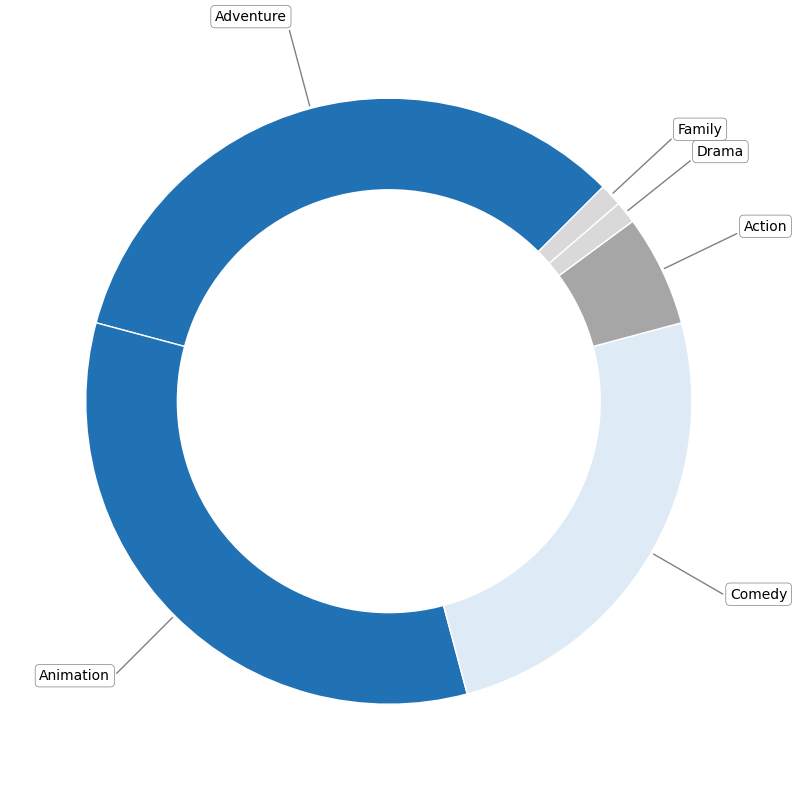

In [142]:
# Visualize

labels = genre_count['value'].tolist()
sizes = genre_count['genre_count'].tolist()
colors = ['#2171b5', '#2171b5', '#deebf7', '#a6a6a6', '#d9d9d9', '#d9d9d9']

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts = ax.pie(sizes, labels=None, colors=colors, startangle=45, wedgeprops=dict(width=0.4, edgecolor='white'))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    ha = 'left' if x >= 0 else 'right'
    connectionstyle = f"angle,angleA=0,angleB={angle}"

    ax.annotate(
        labels[i],
        xy=(x, y),
        xytext=(1.3 * x, 1.3 * y),
        horizontalalignment=ha,
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5),
        arrowprops=dict(arrowstyle="-", color="gray", connectionstyle=connectionstyle)
    )
plt.tight_layout()
plt.show()

<font color = "blue"></font>

<font color = "blue">What are the top 5 most common subgenres?</font>

In [145]:
subgenre_count = genres_df[genres_df.category == "Subgenre"].groupby("value", as_index = False)[["film"]].count().rename(
    columns = {"film" : "subgenre_count"})
subgenre_count = subgenre_count.sort_values("subgenre_count", ascending = False)
top_5_subgenre = subgenre_count.head()

# View the result
top_5_subgenre

,value,subgenre_count
6,Computer Animation,28
11,Fantasy,14
32,Urban Adventure,8
26,Supernatural Fantasy,7
5,Coming-of-Age,6


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='value', ylabel='subgenre_count'>

Text(0.5, 0, 'Sub-Genre Type')

Text(0, 0.5, 'Number of Appearance')

Text(0.5, 1.0, 'Top 5 Most Common Sub-Genre across all Films')

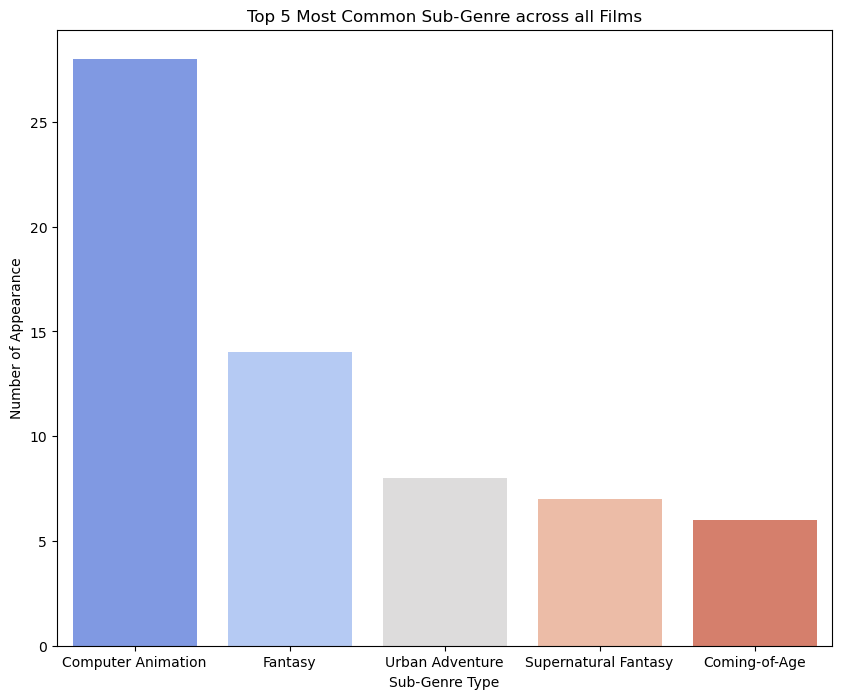

In [146]:
# Visualize
plt.figure(figsize = (10,8))
sns.barplot(x = "value", y = "subgenre_count", data = top_5_subgenre, palette = "coolwarm")
plt.xlabel("Sub-Genre Type")
plt.ylabel("Number of Appearance")
plt.title("Top 5 Most Common Sub-Genre across all Films")

4. **Box Office Data**

**Key Questions**

<ul>
    <li>How much is the estimated spending across all the films?</li>
    <li>How much is the budget on average?</li>
    <li>Which films exceed the average estimated budget, and how many are there?</li>
    <li>Which films fall below the average estimated budget, and how many are there?</li>
    <li>Which film(s) had the most and least expensive budget?</li>
    <li>How much did the box office earned in the US-Canada and other Markets?</li>
    <li>What was the total worldwide box office revenue, including US-Canada and other markets?</li>
    <li>Among the profit making films, which films generated a global ROI exceeding their initial budget by more than 100%?</li>
    <li>Among the profit making films, which films generated a global ROI of under 100%?</li>
    <li>Which films has incurred a loss?</li>
    <li>Which films has incurred more revenue in US-Canada compared to other regions and vice versa?</li>
</ul>

<font color = "blue">How much is the estimated spending across all the films?</font>

In [150]:
total_budget = box_off_df.budget.sum()
billion = 1000000000.0

print("The pixar films has an estimated budget of ${} billion across all the films.".format(
    (total_budget / billion).round(2)))

The pixar films has an estimated budget of $4.35 billion across all the films.


<font color = "blue">How much is the budget on average?</font>

In [152]:
average_budget = box_off_df.budget.mean()
million = 1000000.0

print("On an average, the Pixar films has an estimated budget of ${} million.".format((average_budget / million).round(2)))

On an average, the Pixar films has an estimated budget of $155.39 million.


<font color = "blue">Which films exceed the average estimated budget, and how many are there?</font>

In [154]:
exceeding_avg = box_off_df[box_off_df.budget > average_budget]
exceeding_avg[["film", "budget"]]

print("")
print("There are {} films who's budget is more than the overall average budget of ${} million.".format(
    len(exceeding_avg), (average_budget / million).round(2)))

,film,budget
8,WALL-E,180000000.0
9,Up,175000000.0
10,Toy Story 3,200000000.0
11,Cars 2,200000000.0
12,Brave,185000000.0
13,Monsters University,200000000.0
14,Inside Out,175000000.0
15,The Good Dinosaur,175000000.0
16,Finding Dory,200000000.0
17,Cars 3,175000000.0



There are 18 films who's budget is more than the overall average budget of $155.39 million.


<font color = "blue">Which films fall below the average estimated budget, and how many are there?</font>

In [156]:
below_avg = box_off_df[(box_off_df.budget < average_budget) & (box_off_df.film != "Luca")]
below_avg[["film", "budget"]]
print("")
print("There are {} films who's budget falls below the overall average budget of ${} million.".format(
    len(below_avg), (average_budget / million).round(2)))

,film,budget
0,Toy Story,30000000.0
1,A Bug's Life,120000000.0
2,Toy Story 2,90000000.0
3,"Monsters, Inc.",115000000.0
4,Finding Nemo,94000000.0
5,The Incredibles,92000000.0
6,Cars,120000000.0
7,Ratatouille,150000000.0
22,Soul,150000000.0



There are 9 films who's budget falls below the overall average budget of $155.39 million.


The film "Luca" was not considered because the budget was not available.

<font color = "blue">Which film(s) had the most and least expensive budget?</font>

In [159]:
max_budget = box_off_df.budget.max()
max_budget_films = box_off_df[box_off_df.budget == max_budget][["film"]]

print("There are {} films with most expensive budget of ${} million and they are listed below.".format(
    len(max_budget_films), max_budget/million))
print("")
max_budget_films

There are 9 films with most expensive budget of $200.0 million and they are listed below.



,film
10,Toy Story 3
11,Cars 2
13,Monsters University
16,Finding Dory
19,Incredibles 2
20,Toy Story 4
25,Lightyear
26,Elemental
27,Inside Out 2


In [160]:
min_budget = box_off_df[box_off_df.film != "Luca"].budget.min()
min_budget_films = box_off_df[(box_off_df.film != "Luca") & (box_off_df.budget == min_budget)][["film"]]

print("There is {} film with least expensive budget of ${} million and it is listed below.".format(
    len(min_budget_films), min_budget/million))
print("")
min_budget_films

There is 1 film with least expensive budget of $30.0 million and it is listed below.



,film
0,Toy Story


<font color = "blue">How much did the box office earned in the US-Canada and other Markets?</font>

In [162]:
bo_us_canada = box_off_df["box_office_us_canada"].sum()

print("The box office earned in the US and Canada market was ${} billion.".format(
    (bo_us_canada / billion).round(2)))

The box office earned in the US and Canada market was $6.93 billion.


<font color = "blue"></font>

In [164]:
bo_other = box_off_df["box_office_other"].sum()

print("The box office earned in different markets other than US and Canada is ${} billion.".format(
    (bo_other / billion).round(2)))

The box office earned in different markets other than US and Canada is $10.11 billion.


<font color = "blue">What was the total worldwide box office revenue, including US-Canada and other markets?</font>

In [166]:
bo_world = box_off_df["box_office_worldwide"].sum()

print("The box offices' total worldwide revenue is ${} billion.".format((bo_world / billion).round(2)))

The box offices' total worldwide revenue is $17.04 billion.


<font color = "blue">Among the profit making films, which films generated a global ROI exceeding their initial budget by more than 100%?</font>

In [168]:
roi_df = box_off_df[box_off_df.film != "Luca"]

# Calculate ROI
roi_df["roi_worldwide"] = ((roi_df["box_office_worldwide"] - roi_df["budget"]) / roi_df["budget"])*100
roi_df["roi_worldwide"] = roi_df["roi_worldwide"].round(2)

# View the Data
roi_df.head()

,film,budget,box_office_us_canada,box_office_other,box_office_worldwide,roi_worldwide
0,Toy Story,30000000.0,223225679.0,171210907.0,394436586.0,1214.79
1,A Bug's Life,120000000.0,162798565.0,200460294.0,363258859.0,202.72
2,Toy Story 2,90000000.0,245852179.0,265506097.0,511358276.0,468.18
3,"Monsters, Inc.",115000000.0,255873250.0,272900000.0,528773250.0,359.80
4,Finding Nemo,94000000.0,339714978.0,531300000.0,871014978.0,826.61


In [169]:
exceeding_100 = roi_df[roi_df.roi_worldwide > 100.00]
exceeding_100 = exceeding_100.sort_values("roi_worldwide", ascending = False)
exceeding_100 = exceeding_100[["film", "budget", "box_office_worldwide", "roi_worldwide"]]

print("There are {} films (listed below) who's global ROI exceeded the initial budget by more than 100%.".format(len(exceeding_100)))
print("")
exceeding_100

There are 22 films (listed below) who's global ROI exceeded the initial budget by more than 100%.



,film,budget,box_office_worldwide,roi_worldwide
0,Toy Story,30000000.0,3.944366e+08,1214.79
4,Finding Nemo,94000000.0,8.710150e+08,826.61
27,Inside Out 2,200000000.0,1.698031e+09,749.02
5,The Incredibles,92000000.0,6.314421e+08,586.35
19,Incredibles 2,200000000.0,1.242805e+09,521.40
2,Toy Story 2,90000000.0,5.113583e+08,468.18
20,Toy Story 4,200000000.0,1.073395e+09,436.70
10,Toy Story 3,200000000.0,1.066970e+09,433.48
16,Finding Dory,200000000.0,1.028571e+09,414.29
14,Inside Out,175000000.0,8.576112e+08,390.06


<font color = "blue">Among the profit making films, which films generated a global ROI of under 100%?</font>

In [171]:
profit_under_100 = roi_df[(roi_df.roi_worldwide > 0.00) & (roi_df.roi_worldwide <= 100.00)]
profit_under_100 = profit_under_100.sort_values("roi_worldwide", ascending = False)
profit_under_100 = profit_under_100[["film", "budget", "box_office_worldwide", "roi_worldwide"]]

print("Among the profit making films, there are {} films (listed below) who's global ROI is under the 100% mark.".
      format(len(profit_under_100)))
print("")
profit_under_100

Among the profit making films, there are 2 films (listed below) who's global ROI is under the 100% mark.



,film,budget,box_office_worldwide,roi_worldwide
15,The Good Dinosaur,175000000.0,332207671.0,89.83
25,Lightyear,200000000.0,226425420.0,13.21


<font color = "blue">Which films has incurred a loss?</font>

In [173]:
loss_films = roi_df[roi_df.roi_worldwide < 0.00]
loss_films = loss_films.sort_values("roi_worldwide", ascending = True)
loss_films = loss_films[["film", "budget", "box_office_worldwide", "roi_worldwide"]]

print("There are {} films (listed below) who has incurred a loss.".format(len(loss_films)))
print("")
loss_films

There are 3 films (listed below) who has incurred a loss.



,film,budget,box_office_worldwide,roi_worldwide
24,Turning Red,175000000.0,21813358.0,-87.54
21,Onward,175000000.0,141940042.0,-18.89
22,Soul,150000000.0,121903885.0,-18.73


In [174]:
total_count = len(exceeding_100) + len(profit_under_100) + len(loss_films)
pr_above_100 = ((len(exceeding_100) / total_count) * 100)
pr_under_100 = ((len(profit_under_100) / total_count) * 100)
lr = ((len(loss_films) / total_count) * 100)

result = {
            "roi_mark" : ["profit over 100%", "profit under 100%", "loss"],
            "film_ratio" : [pr_above_100, pr_under_100, lr]
         }

result_df = pd.DataFrame(result)

# View
result_df["film_ratio"] = result_df["film_ratio"].round()
result_df

,roi_mark,film_ratio
0,profit over 100%,81.0
1,profit under 100%,7.0
2,loss,11.0


Text(0.5, 1.0, 'Film ROI Distribution')

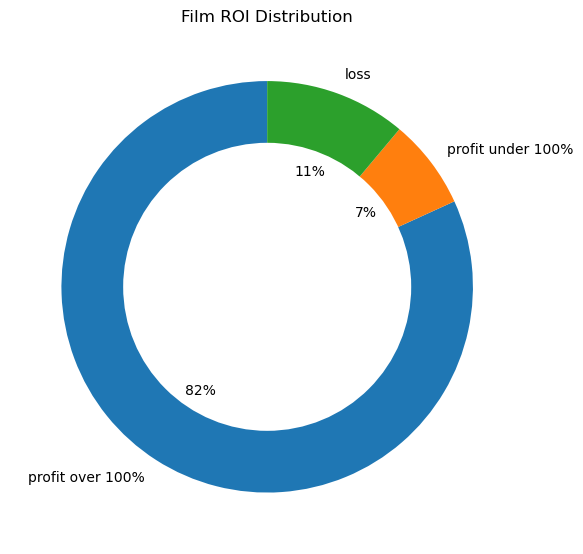

In [175]:
# Visualize
labels = result_df["roi_mark"]
sizes = result_df["film_ratio"]

# Plot
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.8, 0.3, len(sizes))]
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct="%1.0f%%", startangle=90,
                                                                        wedgeprops=dict(width=0.4), textprops=dict(color="black"))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.title("Film ROI Distribution")
plt.tight_layout()
plt.show()

<font color = "blue">Which films has incurred more revenue in US-Canada compared to other regions and vice versa?</font>

In [177]:
# US and Canada leading in revenue compared to Other markets
us_canada_lead = box_off_df[box_off_df["box_office_us_canada"] > box_off_df["box_office_other"]]

print("There are {} films (listed below) who all are leading in US-Canada region compared to other regions.".format(len(us_canada_lead)))
print("")
us_canada_lead[["film"]]

There are 3 films (listed below) who all are leading in US-Canada region compared to other regions.



,film
0,Toy Story
6,Cars
25,Lightyear


In [178]:
# Other regions leading in revenue compared to US-Canada markets
other_lead = box_off_df[box_off_df["box_office_us_canada"] < box_off_df["box_office_other"]]

print("There are {} films (listed below) who all are leading in other regions compared to US-Canada regions.".format(len(other_lead)))
print("")
other_lead[["film"]]

There are 25 films (listed below) who all are leading in other regions compared to US-Canada regions.



,film
1,A Bug's Life
2,Toy Story 2
3,"Monsters, Inc."
4,Finding Nemo
5,The Incredibles
7,Ratatouille
8,WALL-E
9,Up
10,Toy Story 3
11,Cars 2


In [179]:
total_movie = 28
us_canada_ratio = (len(us_canada_lead) / total_movie) * 100
other_ratio = 100 - us_canada_ratio

lead_result = {
    "regions" : ["US-Canada", "Other"],
    "leading_ratio" : [us_canada_ratio, other_ratio] 
}

lead_df = pd.DataFrame(lead_result)
lead_df["leading_ratio"] = lead_df["leading_ratio"].round()
lead_df

,regions,leading_ratio
0,US-Canada,11.0
1,Other,89.0


([<matplotlib.patches.Wedge at 0x150ae3260>,
 [Text(-0.3726117103318049, 1.0349688465473768, 'US-Canada'),
  Text(0.3726116618814165, -1.0349688639905885, 'Other')],
 [Text(-0.20324275109007536, 0.5645284617531144, '11.0%'),
  Text(0.20324272466259077, -0.5645284712675936, '89.0%')])

Text(0.5, 1.0, 'Region-Wise Leading Market Share')

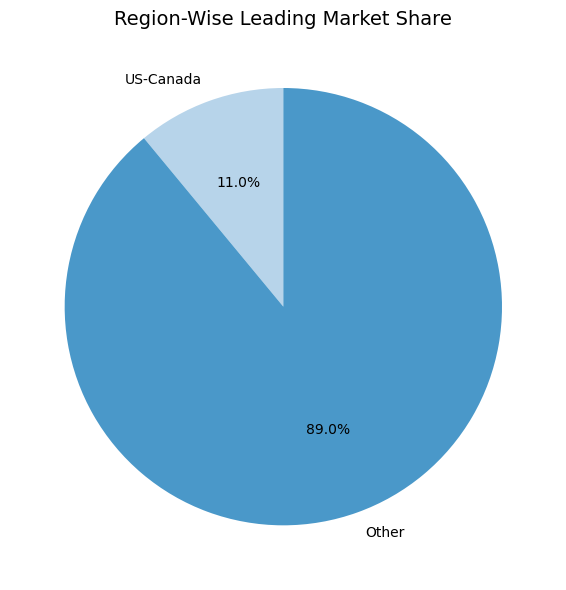

In [180]:
# Visualize
labels = lead_df["regions"]
sizes = lead_df["leading_ratio"]

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=plt.cm.Blues([0.3, 0.6]))
plt.title("Region-Wise Leading Market Share", fontsize=14)
plt.tight_layout()
plt.show()

5. **Public Reviews Data**

**Key Questions**

<ul>
    <li>What is the average, minimum, and maximum score for each platform (Rotten Tomatoes, Metacritic, IMDb)?</li>
    <li>How do Rotten Tomatoes and Metacritic scores compare across all films?</li>
    <li>How many films received a perfect 100 Rotten Tomatoes score?</li>
    <li>Do films with higher Rotten Tomatoes scores also have high IMDb scores?</li>
    <li>Is there a strong correlation between Metacritic and Rotten Tomatoes scores?</li>
    <li>How does IMDb rating vary with the number of IMDb reviews?</li>
    <li>Which 5 films have the highest overall ratings across all platforms?</li>
    <li>Which films had the biggest mismatch between critical and audience scores? (e.g., high IMDb but low Metacritic)</li>
    <li>How do films rated “A+” on CinemaScore compare to those rated “A” or “A-”?</li>
</ul>

In [183]:
reviews_df.head()

,film,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,cinema_score,imdb_score,imdb_counts
0,Toy Story,100,96,95,26,A,8.3,1089101
1,A Bug's Life,92,91,78,23,A,7.2,319596
2,Toy Story 2,100,172,88,34,A+,7.9,630573
3,"Monsters, Inc.",96,199,79,35,A+,8.1,1000657
4,Finding Nemo,99,270,90,38,A+,8.2,1132877


<font color = "blue">What is the average, minimum, and maximum score for each platform (Rotten Tomatoes, Metacritic, IMDb)?</font>

In [185]:
# Rotten Tomatoes
rot_tom_min = reviews_df["rotten_tomatoes_score"].min()
rot_tom_avg = reviews_df["rotten_tomatoes_score"].mean().round(2)
rot_tom_max = reviews_df["rotten_tomatoes_score"].max()

# Metacritic
meta_min = reviews_df["metacritic_score"].min()
meta_avg = reviews_df["metacritic_score"].mean().round(2)
meta_max = reviews_df["metacritic_score"].max()

# IMDb
imdb_min = reviews_df["imdb_score"].min()
imdb_avg = reviews_df["imdb_score"].mean().round(2)
imdb_max = reviews_df["imdb_score"].max()

print("The Rotten Tomatoes scores range from {} to {}, with an average score of {} across all films.".format(
    rot_tom_min, rot_tom_max, rot_tom_avg))
print("The Metacritic scores range from {} to {}, with an average score of {} across all films.".format(
    meta_min, meta_max, meta_avg))
print("The IMDb scores range from {} to {}, with an average score of {} across all films.".format(
    imdb_min, imdb_max, imdb_avg))

The Rotten Tomatoes scores range from 40 to 100, with an average score of 88.36 across all films.
The Metacritic scores range from 57 to 96, with an average score of 78.14 across all films.
The IMDb scores range from 6.1 to 8.4, with an average score of 7.54 across all films.


<font color = "blue">How do Rotten Tomatoes and Metacritic scores compare across all films?</font>

<Figure size 600x500 with 0 Axes>

<Axes: xlabel='rotten_tomatoes_score', ylabel='metacritic_score'>

Text(0.5, 1.0, 'Rotten Tomatoes Vs Metecritic Scores across all Films')

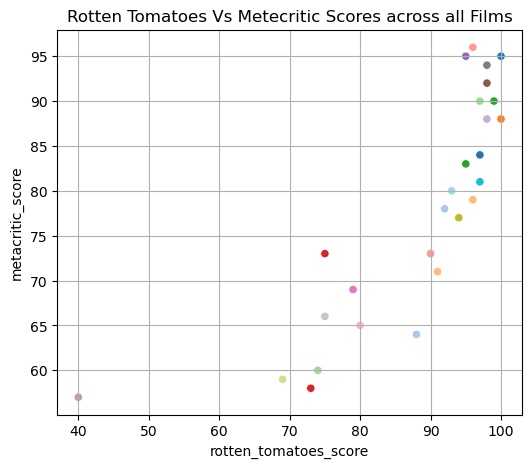

In [187]:
# Scatter plot
plt.figure(figsize = (6,5))
sns.scatterplot(data = reviews_df, x = "rotten_tomatoes_score", y = "metacritic_score", palette = "tab20", hue = "film", legend = False)
plt.title("Rotten Tomatoes Vs Metecritic Scores across all Films")
plt.grid(True)
plt.show()

As *Rotten Tomatoes* scores increases, *Metacritic* scores also tends to increase indicates a positive correlation between these two scores.

<font color = "blue">How many films received a perfect 100 Rotten Tomatoes score?</font>

In [190]:
rot_tom_100 = reviews_df[reviews_df.rotten_tomatoes_score == 100][["film", "rotten_tomatoes_score"]]

print("{} films received a perfect 100 Rotten Tomatoes score.".format(len(rot_tom_100)))
print("")
rot_tom_100

2 films received a perfect 100 Rotten Tomatoes score.



,film,rotten_tomatoes_score
0,Toy Story,100
2,Toy Story 2,100


<font color = "blue">Do films with higher Rotten Tomatoes scores also have high IMDb scores?</font>

In [192]:
reviews_df[reviews_df.rotten_tomatoes_score == 100][["film", "rotten_tomatoes_score", "imdb_score"]]

,film,rotten_tomatoes_score,imdb_score
0,Toy Story,100,8.3
2,Toy Story 2,100,7.9


In [193]:
# Checking the correlation between these 2 scores
correlation = reviews_df['rotten_tomatoes_score'].corr(reviews_df['imdb_score'])

print(f"Correlation between Rotten Tomatoes and IMDb scores: {correlation:.2f}")

Correlation between Rotten Tomatoes and IMDb scores: 0.82


Since 0.82 is close to 1, it suggests that as Rotten Tomatoes scores increase, IMDb scores also tend to increase.

<font color = "blue">Is there a strong correlation between Metacritic and Rotten Tomatoes scores?</font>

In [196]:
# Checking the correlation between these 2 scores
rt_meta_corr = reviews_df['rotten_tomatoes_score'].corr(reviews_df['metacritic_score'])

print(f"Correlation between Rotten Tomatoes and Metacritics scores: {rt_meta_corr:.2f}")

Correlation between Rotten Tomatoes and Metacritics scores: 0.82


Since 0.82 is close to 1, it suggests that as Rotten Tomatoes scores increase, Metacritic scores also tend to increase.

<font color = "blue">How does IMDb rating vary with the number of IMDb reviews?</font>

In [199]:
reviews_df.head()

,film,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,cinema_score,imdb_score,imdb_counts
0,Toy Story,100,96,95,26,A,8.3,1089101
1,A Bug's Life,92,91,78,23,A,7.2,319596
2,Toy Story 2,100,172,88,34,A+,7.9,630573
3,"Monsters, Inc.",96,199,79,35,A+,8.1,1000657
4,Finding Nemo,99,270,90,38,A+,8.2,1132877


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='imdb_score', ylabel='imdb_counts'>

Text(0.5, 0, 'IMDb Score')

Text(0, 0.5, 'Number of Reviewers (in Million)')

Text(0.5, 1.0, 'Relationship between IMDb Rating Vs Reviewers')

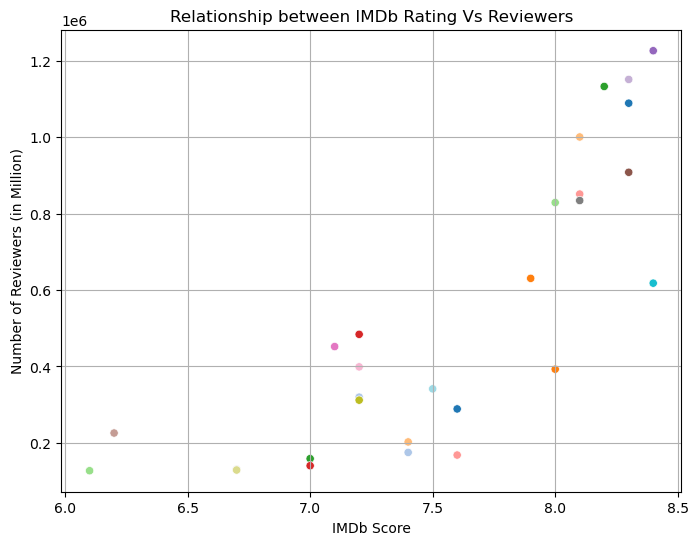

In [200]:
# Scatter Plot
plt.figure(figsize = (8,6))
sns.scatterplot(data = reviews_df, x = "imdb_score", y = "imdb_counts", hue = "film", palette = "tab20", legend = False)
plt.xlabel("IMDb Score")
plt.ylabel("Number of Reviewers (in Million)")
plt.title("Relationship between IMDb Rating Vs Reviewers")
plt.grid(True)
plt.show()

- A prominent cluster appears in the top-right, where films have IMDb scores above 8.0 and over 800,000 reviews—some exceeding 1.2 million.
- Films with IMDb scores between 6.0 and 7.0 typically have fewer than 250,000 reviewers.
- Films with IMDb scores between 7.0 and 8.0 show a wider range in reviewer counts, from just over 100,000 to over 600,000.

<font color = "blue">Which 5 films have the highest overall ratings across all platforms?</font>

In [203]:
# Extract the Rating Columns
combine_score_df = reviews_df[["film", "rotten_tomatoes_score", "metacritic_score", "imdb_score"]]

# Normalize the Rating
scaled_columns = ["rotten_tomatoes_score", "metacritic_score"]
combine_score_df[scaled_columns] = combine_score_df[scaled_columns] / 10

# Create new column for overall average
combine_score_df["avg_score"] = (combine_score_df["rotten_tomatoes_score"] + combine_score_df["metacritic_score"] +
                                 combine_score_df["imdb_score"]) / 3
combine_score_df["avg_score"] = combine_score_df["avg_score"].round(1)

# Sort the film by highest to lowest overall average score
combine_score_df = combine_score_df.sort_values("avg_score", ascending = False)

# View the Top 5 films with highest overall ratings
top_5_film = combine_score_df.head()
top_5_film

,film,rotten_tomatoes_score,metacritic_score,imdb_score,avg_score
0,Toy Story,10.0,9.5,8.3,9.3
7,Ratatouille,9.6,9.6,8.1,9.1
10,Toy Story 3,9.8,9.2,8.3,9.1
8,WALL-E,9.5,9.5,8.4,9.1
14,Inside Out,9.8,9.4,8.1,9.1


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='film', ylabel='avg_score'>

Text(0.5, 0, 'Film')

Text(0, 0.5, 'Ratings')

Text(0.5, 1.0, 'Highest Rated Films Across All Platforms')

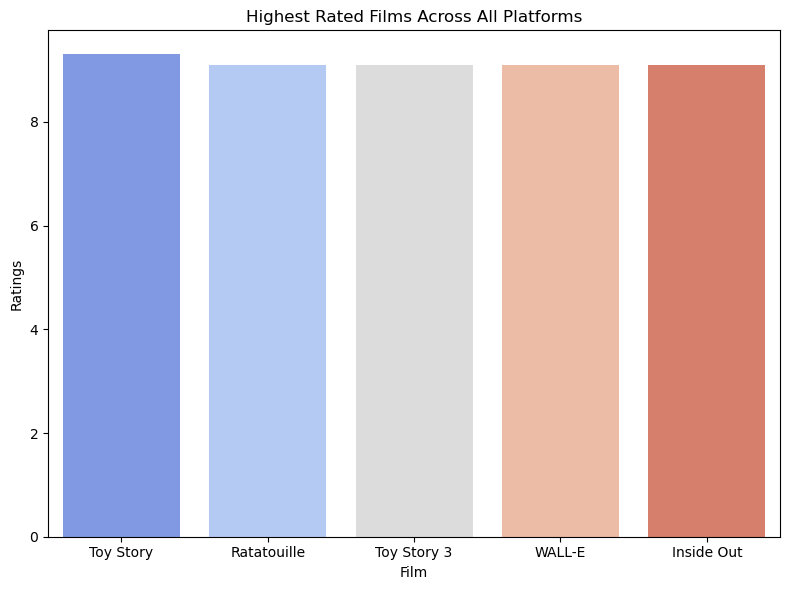

In [204]:
# Visualize
plt.figure(figsize = (8,6))
sns.barplot(data = top_5_film, x = "film", y = "avg_score", palette = "coolwarm")
plt.xlabel("Film")
plt.ylabel("Ratings")
plt.title("Highest Rated Films Across All Platforms")
plt.tight_layout()
plt.show()

<font color = "blue">Which films had the biggest mismatch between critical and audience scores? (e.g., high IMDb but low Metacritic)</font>

In [206]:
mismatch_df = combine_score_df.drop(columns = ["rotten_tomatoes_score", "avg_score"])

# Add new column of the difference and absolute difference
mismatch_df["diff"] = mismatch_df["imdb_score"] - mismatch_df["metacritic_score"]
mismatch_df["abs_diff"] = mismatch_df["diff"].abs()

# Sort by absolute difference
mismatch_df = mismatch_df.sort_values("abs_diff", ascending = False)

# View the Result
mismatch_df

,film,metacritic_score,imdb_score,diff,abs_diff
7,Ratatouille,9.6,8.1,-1.5,1.5
14,Inside Out,9.4,8.1,-1.3,1.3
24,Turning Red,8.3,7.0,-1.3,1.3
26,Elemental,5.8,7.0,1.2,1.2
0,Toy Story,9.5,8.3,-1.2,1.2
8,WALL-E,9.5,8.4,-1.1,1.1
5,The Incredibles,9.0,8.0,-1.0,1.0
21,Onward,6.4,7.4,1.0,1.0
2,Toy Story 2,8.8,7.9,-0.9,0.9
10,Toy Story 3,9.2,8.3,-0.9,0.9


- A **positive** diff = audiences liked it more than critics
- A **negative** diff = critics rated it higher than audiences.

In [208]:
imdb_meta = mismatch_df[mismatch_df["diff"] > 0.0]
meta_imdb = mismatch_df[mismatch_df["diff"] < 0.0]

print("There are {} films where critics rated it higher than audiences, which is more than the {} films where audiences liked it more than critics.".format(
    len(meta_imdb), len(imdb_meta)))

There are 16 films where critics rated it higher than audiences, which is more than the 12 films where audiences liked it more than critics.


<font color = "blue">How do films rated “A+” on CinemaScore compare to those rated “A” or “A-”?</font>

In [210]:
reviews_df.head()

,film,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,cinema_score,imdb_score,imdb_counts
0,Toy Story,100,96,95,26,A,8.3,1089101
1,A Bug's Life,92,91,78,23,A,7.2,319596
2,Toy Story 2,100,172,88,34,A+,7.9,630573
3,"Monsters, Inc.",96,199,79,35,A+,8.1,1000657
4,Finding Nemo,99,270,90,38,A+,8.2,1132877


In [211]:
# Unique Cinema Score
reviews_df["cinema_score"].unique()

array(['A', 'A+', 'A-', 'Unknown'], dtype=object)

In [212]:
# Create group for each Cinema Score
a_plus_df = reviews_df[reviews_df.cinema_score == "A+"]
a_df = reviews_df[reviews_df.cinema_score == "A"]
a_minus_df = reviews_df[reviews_df.cinema_score == "A-"]

# Metrics for each Group
# A+ Rating
a_plus_rt_avg = (a_plus_df["rotten_tomatoes_score"] / 10).mean().round(1)
a_plus_m_avg = (a_plus_df["metacritic_score"] / 10).mean().round(1)
a_plus_imdb_avg = a_plus_df["imdb_score"].mean().round(1)

# A Rating
a_rt_avg = (a_df["rotten_tomatoes_score"] / 10).mean().round(1)
a_m_avg = (a_df["metacritic_score"] / 10).mean().round(1)
a_imdb_avg = a_df["imdb_score"].mean().round(1)

# A- Rating
a_minus_rt_avg = (a_minus_df["rotten_tomatoes_score"] / 10).mean().round(1)
a_minus_m_avg = (a_minus_df["metacritic_score"] / 10).mean().round(1)
a_minus_imdb_avg = a_minus_df["imdb_score"].mean().round(1)

**Do “A+” films have higher IMDb scores than “A” or “A–”?**

In [214]:
if a_plus_imdb_avg > a_imdb_avg:
    print("Yes, 'A+' films have higher average IMDb ratings of {} than 'A' films of {}.".format(a_plus_imdb_avg, a_imdb_avg))
else:
    print("No, 'A+' films doesn't have higher average IMDb ratings as the average rating of {} is less than {} of 'A' films.".format
         (a_plus_imdb_avg, a_imdb_avg))

Yes, 'A+' films have higher average IMDb ratings of 8.1 than 'A' films of 7.5.


In [215]:
if a_plus_imdb_avg > a_minus_imdb_avg:
    print("Yes, 'A+' films have higher average IMDb ratings of {} than 'A-' films of {}.".format(a_plus_imdb_avg, a_minus_imdb_avg))
else:
    print("No, 'A+' films doesn't have higher average IMDb ratings as the average rating of {} is less than {} of 'A-' films.".format
         (a_plus_imdb_avg, a_minus_imdb_avg))

Yes, 'A+' films have higher average IMDb ratings of 8.1 than 'A-' films of 6.6.


**Do “A+” films have higher Rotten Tomatoes scores than “A” or “A–”?**

In [217]:
if a_plus_rt_avg > a_rt_avg:
    print("Yes, 'A+' films have higher average Rotten Tomatoes ratings of {} than 'A' films of {}.".format(a_plus_rt_avg, a_rt_avg))
else:
    print("No, 'A+' films doesn't have higher average Rotten Tomatoes ratings as the average rating of {} is less than {} of 'A' films.".format
         (a_plus_rt_avg, a_rt_avg))

Yes, 'A+' films have higher average Rotten Tomatoes ratings of 9.7 than 'A' films of 8.7.


In [218]:
if a_plus_rt_avg > a_minus_rt_avg:
    print("Yes, 'A+' films have higher average Rotten Tomatoes ratings of {} than 'A-' films of {}.".format(a_plus_rt_avg, a_minus_rt_avg))
else:
    print("No, 'A+' films doesn't have higher average Rotten Tomatoes ratings as the average rating of {} is less than {} of 'A-' films.".format
         (a_plus_rt_avg, a_minus_rt_avg))

Yes, 'A+' films have higher average Rotten Tomatoes ratings of 9.7 than 'A-' films of 6.7.


**Do “A+” films have higher Metacritic scores than “A” or “A–”?**

In [220]:
if a_plus_m_avg > a_m_avg:
    print("Yes, 'A+' films have higher average Metacritic ratings of {} than 'A' films of {}.".format(a_plus_m_avg, a_m_avg))
else:
    print("No, 'A+' films doesn't have higher average Metacritic ratings as the average rating of {} is less than {} of 'A' films.".format
         (a_plus_m_avg, a_m_avg))

Yes, 'A+' films have higher average Metacritic ratings of 8.5 than 'A' films of 7.8.


In [221]:
if a_plus_m_avg > a_minus_m_avg:
    print("Yes, 'A+' films have higher average Metacritic ratings of {} than 'A-' films of {}.".format(a_plus_m_avg, a_minus_m_avg))
else:
    print("No, 'A+' films doesn't have higher average Metacritic ratings as the average rating of {} is less than {} of 'A-' films.".format
         (a_plus_m_avg, a_minus_m_avg))

Yes, 'A+' films have higher average Metacritic ratings of 8.5 than 'A-' films of 6.0.


6. **Academy Awards Data**

**Key Questions**

- How many types of awards are there and what are they?
- How many distinct types of status are there and what are they?
- How many films are Nominated for each award types?
- Which film is nominated for "Adapted Screenplay" award?
- What is the distribution of award statuses?
- How many types of awards per film?
- Which nominated films have also gone on to win the same award?
- Are there specific award categories for which some films are ineligible?
- Are there any films associated with award types that haven't been introduced yet?

In [224]:
awards_df.head()

,film,award_type,status
0,Toy Story,Animated Feature,Award not yet introduced
1,Toy Story,Original Screenplay,Nominated
2,Toy Story,Adapted Screenplay,Ineligible
3,Toy Story,Original Score,Nominated
4,Toy Story,Original Song,Nominated


<font color = "blue">How many types of awards are there and what are they?</font>

In [226]:
print("There are {} types of awards and they are listed below.".format(awards_df["award_type"].nunique()))
awards_df["award_type"].unique().tolist()

There are 9 types of awards and they are listed below.


['Animated Feature',
 'Original Screenplay',
 'Adapted Screenplay',
 'Original Score',
 'Original Song',
 'Other',
 'Sound Editing',
 'Sound Mixing',
 'Best Picture']

<font color = "blue">How many distinct types of status are there and what are they?</font>

In [228]:
print("There are {} statuses which are listed down.".format(awards_df["status"].nunique()))
print("")
awards_df["status"].unique().tolist()

There are 5 statuses which are listed down.



['Award not yet introduced',
 'Nominated',
 'Ineligible',
 'Won Special Achievement',
 'Won']

<font color = "blue">How many films are Nominated for each award types?</font>

In [230]:
nom_df = awards_df[awards_df.status == "Nominated"].groupby("award_type", as_index = False)[["status"]].count().rename(columns = 
                        {"status" : "film_counts"}).sort_values("film_counts", ascending = False)

nom_df

,award_type,film_counts
1,Animated Feature,8
4,Original Screenplay,7
6,Sound Editing,7
3,Original Score,6
5,Original Song,5
7,Sound Mixing,4
2,Best Picture,2
0,Adapted Screenplay,1


Only 1 film is nominated for "Adapted Screenplay" award.

<font color = "blue">Which film is nominated for "Adapted Screenplay" award?</font>

In [233]:
film_name = awards_df[(awards_df.status == "Nominated") & (awards_df.award_type == "Adapted Screenplay")].iloc[0][0]
print("{} is the only film that was nominated for 'Adapted Screenplay' award.".format(film_name))

Toy Story 3 is the only film that was nominated for 'Adapted Screenplay' award.


<font color = "blue">What is the distribution of award statuses?</font>

In [235]:
awards_df.groupby("status", as_index = False)[["film"]].count().rename(columns = {"film" : "film_count"}).\
sort_values("film_count", ascending = False)

,status,film_count
2,Nominated,40
1,Ineligible,28
3,Won,17
0,Award not yet introduced,3
4,Won Special Achievement,1


<font color = "blue">How many types of awards per film?</font>

In [237]:
awards_df.groupby("film", as_index = False)[["award_type"]].count().rename(columns = {"award_type" : "award_count"}).\
sort_values("award_count", ascending = False)

,film,award_count
27,WALL-E,7
26,Up,6
23,Toy Story 3,6
21,Toy Story,6
17,Ratatouille,6
15,"Monsters, Inc.",5
20,The Incredibles,5
8,Finding Nemo,5
18,Soul,5
24,Toy Story 4,3


<font color = "blue">Which nominated films have also gone on to win the same award?</font>

In [239]:
nominated_films = awards_df[awards_df.status == "Nominated"].sort_values("award_type")
won_films  = awards_df[awards_df.status.isin(["Won", "Won Special Achievement"])]
combine_df = nominated_films.merge(won_films, on  = ["film"], how = "left")[["film", "award_type_x", "award_type_y"]].rename(
    columns = {"award_type_x" : "nominated_for", "award_type_y" : "winning_status"})

combine_df.fillna("Not Won", inplace = True)
combine_df["win_status"] = combine_df["winning_status"].apply(lambda x: "Not Won" if x == "Not Won" else "Won")
combine_df = combine_df.drop(columns=["winning_status"])
combine_df

,film,nominated_for,win_status
0,Toy Story 3,Adapted Screenplay,Won
1,Toy Story 3,Adapted Screenplay,Won
2,Inside Out 2,Animated Feature,Not Won
3,Cars,Animated Feature,Not Won
4,Incredibles 2,Animated Feature,Not Won
5,Onward,Animated Feature,Not Won
6,Elemental,Animated Feature,Not Won
7,Luca,Animated Feature,Not Won
8,Turning Red,Animated Feature,Not Won
9,"Monsters, Inc.",Animated Feature,Won


([<matplotlib.patches.Wedge at 0x150ed6600>],
 [Text(-2.0206672185931328e-16, -1.1, 'Won')],
 [Text(-1.1021821192326178e-16, -0.6, '100.0%')])

Text(0.5, 1.0, 'Adapted Screenplay')

([<matplotlib.patches.Wedge at 0x150cf45c0>,
 [Text(-0.4209517756015994, -1.0162674857624152, 'Not Won'),
  Text(0.4209517756015995, 1.0162674857624152, 'Won')],
 [Text(-0.22961005941905419, -0.5543277195067718, '87.5%'),
  Text(0.22961005941905427, 0.5543277195067718, '12.5%')])

Text(0.5, 1.0, 'Animated Feature')

([<matplotlib.patches.Wedge at 0x150db24e0>],
 [Text(-2.0206672185931328e-16, -1.1, 'Won')],
 [Text(-1.1021821192326178e-16, -0.6, '100.0%')])

Text(0.5, 1.0, 'Best Picture')

([<matplotlib.patches.Wedge at 0x150e82ea0>,
 [Text(-0.5500000594609761, -0.9526279098330696, 'Won'),
  Text(0.5500001040567062, 0.9526278840857078, 'Not Won')],
 [Text(-0.3000000324332597, -0.5196152235453106, '83.3%'),
  Text(0.30000005675820335, 0.519615209501295, '16.7%')])

Text(0.5, 1.0, 'Original Score')

([<matplotlib.patches.Wedge at 0x150ed7860>],
 [Text(-2.0206672185931328e-16, -1.1, 'Won')],
 [Text(-1.1021821192326178e-16, -0.6, '100.0%')])

Text(0.5, 1.0, 'Original Screenplay')

([<matplotlib.patches.Wedge at 0x150f10620>,
 [Text(-1.0461621424642782, -0.3399187721714579, 'Won'),
  Text(1.0461621106387813, 0.3399188701202254, 'Not Won')],
 [Text(-0.5706338958896062, -0.18541023936624976, '60.0%'),
  Text(0.5706338785302443, 0.18541029279285023, '40.0%')])

Text(0.5, 1.0, 'Original Song')

([<matplotlib.patches.Wedge at 0x150f10dd0>],
 [Text(-2.0206672185931328e-16, -1.1, 'Won')],
 [Text(-1.1021821192326178e-16, -0.6, '100.0%')])

Text(0.5, 1.0, 'Sound Editing')

([<matplotlib.patches.Wedge at 0x150f11c70>],
 [Text(-2.0206672185931328e-16, -1.1, 'Won')],
 [Text(-1.1021821192326178e-16, -0.6, '100.0%')])

Text(0.5, 1.0, 'Sound Mixing')

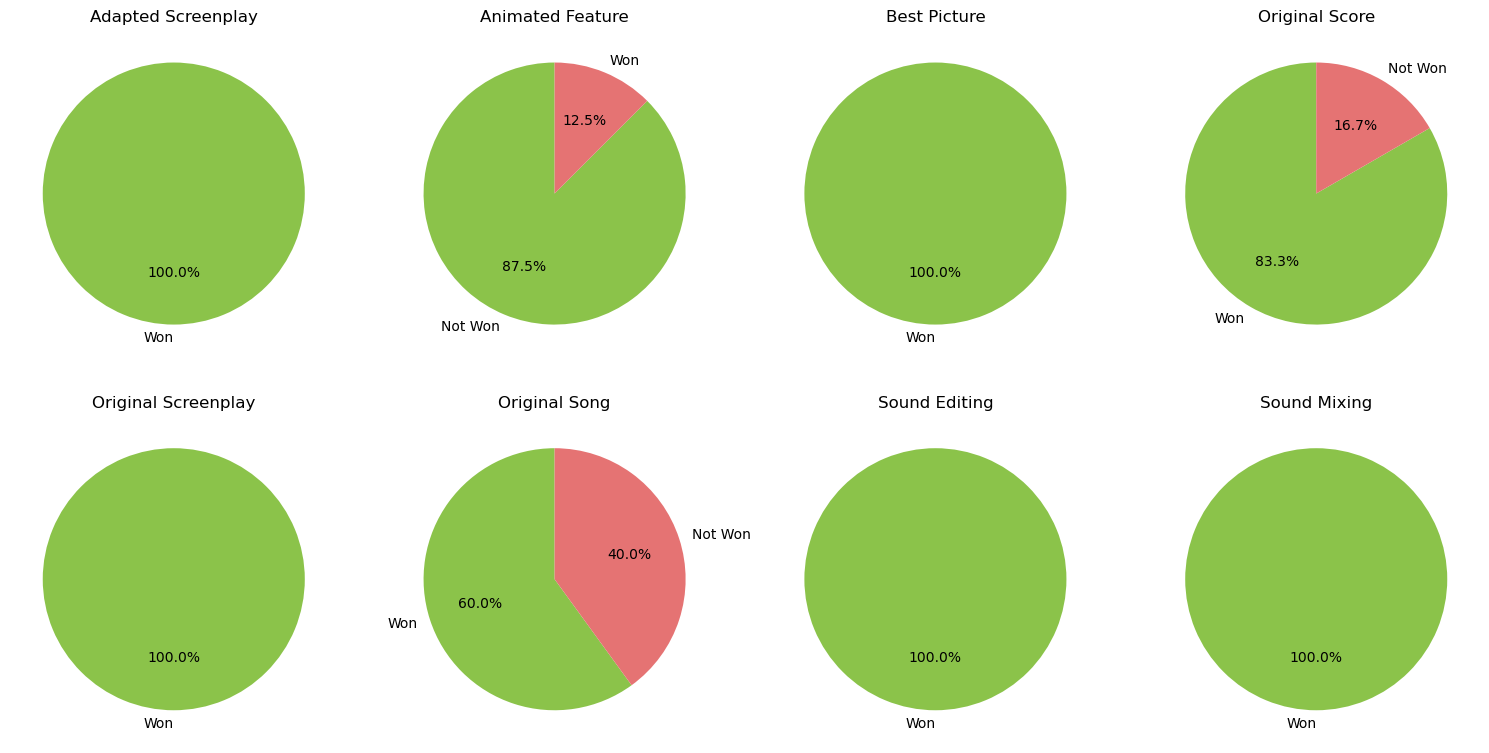

In [240]:
# Get all unique award categories
categories = combine_df["nominated_for"].unique()
num_categories = len(categories)

# Setup: 4 charts per row
cols = 4
rows = (num_categories + cols - 1) // cols  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten 2D axes array for easy iteration

# Plot pie chart for each category
for i, category in enumerate(categories):
    data = combine_df[combine_df["nominated_for"] == category]
    counts = data["win_status"].value_counts()

    axes[i].pie(
        counts,
        labels=counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=["#8bc34a", "#e57373"] if "Won" in counts.index else ["#e57373"]
    )
    axes[i].set_title(category)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

<font color = "blue">Are there specific award categories for which some films are ineligible?</font>

In [242]:
awards_df[awards_df.status == "Ineligible"].groupby(["award_type"], as_index = False)[["film"]].count().rename\
(columns  = {"film" : "num_of_films"})

,award_type,num_of_films
0,Adapted Screenplay,18
1,Original Screenplay,10


In [243]:
awards_df[awards_df.status == "Ineligible"].sort_values(["award_type", "film"], ascending = [True, True])

,film,award_type,status
7,A Bug's Life,Adapted Screenplay,Ineligible
57,Brave,Adapted Screenplay,Ineligible
28,Cars,Adapted Screenplay,Ineligible
66,Coco,Adapted Screenplay,Ineligible
86,Elemental,Adapted Screenplay,Ineligible
19,Finding Nemo,Adapted Screenplay,Ineligible
61,Inside Out,Adapted Screenplay,Ineligible
81,Luca,Adapted Screenplay,Ineligible
13,"Monsters, Inc.",Adapted Screenplay,Ineligible
74,Onward,Adapted Screenplay,Ineligible


<font color = "blue">Are there any films associated with award types that haven't been introduced yet?</font>

In [245]:
awards_df[awards_df.status == "Award not yet introduced"]

,film,award_type,status
0,Toy Story,Animated Feature,Award not yet introduced
6,A Bug's Life,Animated Feature,Award not yet introduced
9,Toy Story 2,Animated Feature,Award not yet introduced
